Dataset Base Path: /kaggle/input/question-1-2/seg_dataset_256/dataset_256
------------------------------
Number of training images: 2000
Number of training labels: 2000
Number of test images:     500
Number of test labels:     500
------------------------------
Image and Label filenames match in both train and test sets.
------------------------------

Displaying 3 random training samples:


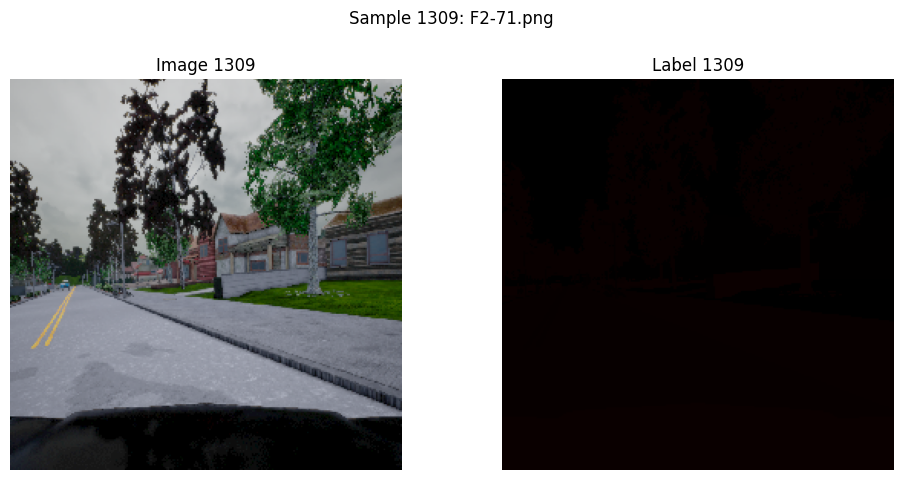

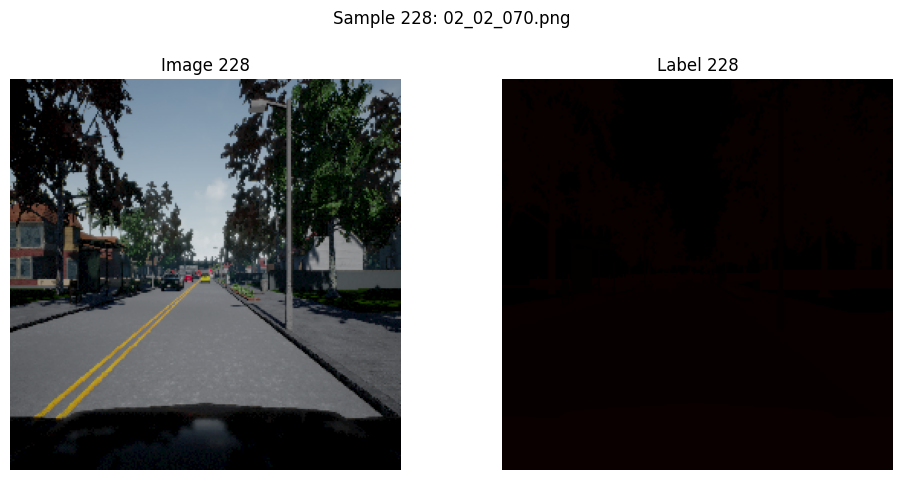

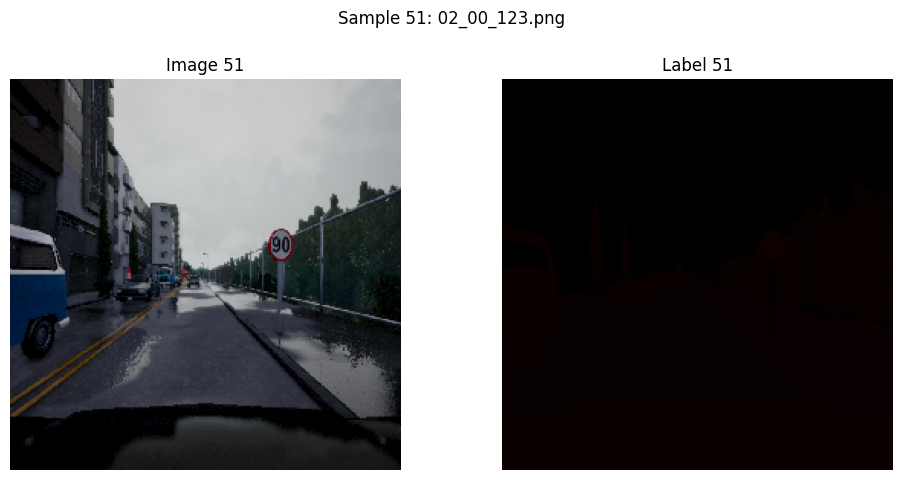


Checking unique values in a sample label mask:
Unique pixel values in 02_00_000.png: [ 0  1  2  3  5  6  7  8  9 10 11 12]
Label shape: (256, 256, 3), dtype: uint8
Interpretation: Looks like a multi-class segmentation mask with 12 classes (including background).

Dataset analysis complete.


In [3]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

# Define base paths based on the provided structure
BASE_PATH = "/kaggle/input/question-1-2/seg_dataset_256/dataset_256"
TRAIN_IMG_PATH = os.path.join(BASE_PATH, "train", "images")
TRAIN_LBL_PATH = os.path.join(BASE_PATH, "train", "labels")
TEST_IMG_PATH = os.path.join(BASE_PATH, "test", "images")
TEST_LBL_PATH = os.path.join(BASE_PATH, "test", "labels")

# --- 1. List and Count Files ---
try:
    # Use glob to find all .png files and sort them to ensure alignment
    train_image_files = sorted(glob.glob(os.path.join(TRAIN_IMG_PATH, "*.png")))
    train_label_files = sorted(glob.glob(os.path.join(TRAIN_LBL_PATH, "*.png")))
    test_image_files = sorted(glob.glob(os.path.join(TEST_IMG_PATH, "*.png")))
    test_label_files = sorted(glob.glob(os.path.join(TEST_LBL_PATH, "*.png")))

    print(f"Dataset Base Path: {BASE_PATH}")
    print("-" * 30)
    print(f"Number of training images: {len(train_image_files)}")
    print(f"Number of training labels: {len(train_label_files)}")
    print(f"Number of test images:     {len(test_image_files)}")
    print(f"Number of test labels:     {len(test_label_files)}")
    print("-" * 30)

    # --- 2. Verify Alignment (Crucial for Segmentation) ---
    # Check if the number of images matches the number of labels in each set
    assert len(train_image_files) == len(train_label_files), \
        f"Mismatch in training set: {len(train_image_files)} images vs {len(train_label_files)} labels"
    assert len(test_image_files) == len(test_label_files), \
        f"Mismatch in test set: {len(test_image_files)} images vs {len(test_label_files)} labels"

    # Optional: Check if filenames match (more robust check)
    for img_f, lbl_f in zip(train_image_files, train_label_files):
        assert os.path.basename(img_f) == os.path.basename(lbl_f), \
            f"Filename mismatch in training set: {os.path.basename(img_f)} vs {os.path.basename(lbl_f)}"
    for img_f, lbl_f in zip(test_image_files, test_label_files):
        assert os.path.basename(img_f) == os.path.basename(lbl_f), \
            f"Filename mismatch in test set: {os.path.basename(img_f)} vs {os.path.basename(lbl_f)}"
    print("Image and Label filenames match in both train and test sets.")
    print("-" * 30)

except AssertionError as e:
    print(f"Error: Data integrity check failed: {e}")
except FileNotFoundError:
    print(f"Error: One or more dataset paths not found. Please check the input path: {BASE_PATH}")
except Exception as e:
    print(f"An unexpected error occurred during file listing: {e}")


# --- 3. Visualize Sample Image-Label Pairs ---

def display_image_label(img_path, lbl_path, index):
    """Loads and displays an image and its corresponding label mask."""
    try:
        image = Image.open(img_path)
        label = Image.open(lbl_path)

        # Check label properties (is it grayscale as expected for masks?)
        # print(f"Index {index}: Label mode: {label.mode}, Size: {label.size}")

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f"Image {index}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        # Display label - often useful to use a grayscale colormap
        plt.imshow(label, cmap='gray')
        plt.title(f"Label {index}")
        plt.axis('off')

        plt.suptitle(f"Sample {index}: {os.path.basename(img_path)}")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found for index {index}. Image: {img_path}, Label: {lbl_path}")
    except Exception as e:
         print(f"Error displaying sample {index}: {e}")

# Display a few random samples from the training set
num_samples_to_show = 3
if train_image_files: # Check if list is not empty
    print(f"\nDisplaying {num_samples_to_show} random training samples:")
    # Ensure we don't request more samples than available
    indices_to_show = random.sample(range(len(train_image_files)), min(num_samples_to_show, len(train_image_files)))
    for i in indices_to_show:
        display_image_label(train_image_files[i], train_label_files[i], i)
else:
    print("No training files found to display.")

# --- 4. Check Unique Values in a Label Mask ---
# This helps understand the classes present (e.g., 0 for background, 1 for foreground)
if train_label_files: # Check if list is not empty
    print("\nChecking unique values in a sample label mask:")
    sample_label_path = train_label_files[0]
    try:
        sample_label_img = Image.open(sample_label_path)
        # Convert to numpy array to easily find unique values
        sample_label_np = np.array(sample_label_img)
        unique_values = np.unique(sample_label_np)
        print(f"Unique pixel values in {os.path.basename(sample_label_path)}: {unique_values}")
        print(f"Label shape: {sample_label_np.shape}, dtype: {sample_label_np.dtype}")

        # Give an interpretation based on common conventions
        if len(unique_values) == 2 and 0 in unique_values:
             print("Interpretation: Looks like a binary segmentation mask (background + one foreground class).")
        elif len(unique_values) > 2:
             print(f"Interpretation: Looks like a multi-class segmentation mask with {len(unique_values)} classes (including background).")
        elif len(unique_values) == 1:
             print(f"Interpretation: Mask contains only one value ({unique_values[0]}). Check if this is expected (e.g., empty mask).")

    except FileNotFoundError:
        print(f"Error: Sample label file not found: {sample_label_path}")
    except Exception as e:
        print(f"Error checking label values: {e}")
else:
    print("No training labels found to check.")

print("\nDataset analysis complete.")

In [1]:
ll -R /kaggle/input/question-1-2

/kaggle/input/question-1-2:
total 0
drwxr-xr-x 3 nobody 0 Apr  8 13:27 seg_dataset_256/

/kaggle/input/question-1-2/seg_dataset_256:
total 0
drwxr-xr-x 4 nobody 0 Apr  8 13:27 dataset_256/

/kaggle/input/question-1-2/seg_dataset_256/dataset_256:
total 0
drwxr-xr-x 4 nobody 0 Apr  8 13:27 test/
drwxr-xr-x 4 nobody 0 Apr  8 13:27 train/

/kaggle/input/question-1-2/seg_dataset_256/dataset_256/test:
total 0
drwxr-xr-x 2 nobody 0 Apr  8 13:27 images/
drwxr-xr-x 2 nobody 0 Apr  8 13:27 labels/

/kaggle/input/question-1-2/seg_dataset_256/dataset_256/test/images:
total 45412
-rw-r--r-- 1 nobody  77328 Apr  8 13:27 02_00_009.png
-rw-r--r-- 1 nobody  82943 Apr  8 13:27 02_00_019.png
-rw-r--r-- 1 nobody  83169 Apr  8 13:27 02_00_029.png
-rw-r--r-- 1 nobody  84415 Apr  8 13:27 02_00_039.png
-rw-r--r-- 1 nobody  84667 Apr  8 13:27 02_00_049.png
-rw-r--r-- 1 nobody  84374 Apr  8 13:27 02_00_059.png
-rw-r--r-- 1 nobody  82467 Apr  8 13:27 02_00_069.png
-rw-r--r-- 1 nobody  75786 Apr  8 13:27 02_00_07

rrooo

Using device: cuda
Dataset path: /kaggle/input/question-1-2/seg_dataset_256/dataset_256
Total training samples: 2000
  Train set size: 1800
  Validation set size: 200
Test set size: 500
Training with early stopping (patience=3, min_delta=0.001)
Maximum epochs: 50, will stop earlier if converged

=== Task 3.1: Vanilla U-Net ===

--- Training vanilla_unet ---


Epoch 1/50 - Train Loss: 0.9606, Train mIoU: 0.3973 | Val Loss: 0.6120, Val mIoU: 0.4802
Validation mIoU improved from -1.0000 to 0.4802
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.4802)


Epoch 2/50 - Train Loss: 0.4680, Train mIoU: 0.5198 | Val Loss: 0.3725, Val mIoU: 0.5461
Validation mIoU improved from 0.4802 to 0.5461
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.5461)


Epoch 3/50 - Train Loss: 0.3189, Train mIoU: 0.5589 | Val Loss: 0.2765, Val mIoU: 0.5705
Validation mIoU improved from 0.5461 to 0.5705
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.5705)


Epoch 4/50 - Train Loss: 0.2431, Train mIoU: 0.5943 | Val Loss: 0.2498, Val mIoU: 0.5996
Validation mIoU improved from 0.5705 to 0.5996
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.5996)


Epoch 5/50 - Train Loss: 0.1937, Train mIoU: 0.6275 | Val Loss: 0.1797, Val mIoU: 0.6392
Validation mIoU improved from 0.5996 to 0.6392
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.6392)


Epoch 6/50 - Train Loss: 0.1544, Train mIoU: 0.6558 | Val Loss: 0.1473, Val mIoU: 0.6635
Validation mIoU improved from 0.6392 to 0.6635
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.6635)


Epoch 7/50 - Train Loss: 0.1332, Train mIoU: 0.6763 | Val Loss: 0.1510, Val mIoU: 0.6771
Validation mIoU improved from 0.6635 to 0.6771
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.6771)


Epoch 8/50 - Train Loss: 0.1207, Train mIoU: 0.6938 | Val Loss: 0.1121, Val mIoU: 0.7096
Validation mIoU improved from 0.6771 to 0.7096
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.7096)


Epoch 9/50 - Train Loss: 0.1087, Train mIoU: 0.7069 | Val Loss: 0.1032, Val mIoU: 0.7203
Validation mIoU improved from 0.7096 to 0.7203
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.7203)


Epoch 10/50 - Train Loss: 0.0913, Train mIoU: 0.7299 | Val Loss: 0.0922, Val mIoU: 0.7309
Validation mIoU improved from 0.7203 to 0.7309
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.7309)


Epoch 11/50 - Train Loss: 0.0795, Train mIoU: 0.7464 | Val Loss: 0.0822, Val mIoU: 0.7455
Validation mIoU improved from 0.7309 to 0.7455
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.7455)


Epoch 12/50 - Train Loss: 0.0727, Train mIoU: 0.7592 | Val Loss: 0.0750, Val mIoU: 0.7595
Validation mIoU improved from 0.7455 to 0.7595
Saved best model to vanilla_unet_best.pth (Val mIoU: 0.7595)


Epoch 13/50 - Train Loss: 0.0657, Train mIoU: 0.7744 | Val Loss: 0.1124, Val mIoU: 0.7224
No improvement in validation mIoU for 1 epochs


Epoch 14/50 - Train Loss: 0.0670, Train mIoU: 0.7706 | Val Loss: 0.0794, Val mIoU: 0.7581
No improvement in validation mIoU for 2 epochs


<ipython-input-1-ad6b20a9065c>:489: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Epoch 15/50 - Train Loss: 0.0578, Train mIoU: 0.7890 | Val Loss: 0.0904, Val mIoU: 0.7466
No improvement in validation mIoU for 3 epochs
Early stopping triggered after 15 epochs
Training stopped early due to convergence. Best Validation mIoU: 0.7595

--- Evaluating Vanilla U-Net on Test Set ---


Test Set Results for Vanilla U-Net:
  Average Loss: 0.0742
  Mean IoU (mIoU): 0.7606
Saved training curves plot to Vanilla_UNet_training_curves.png


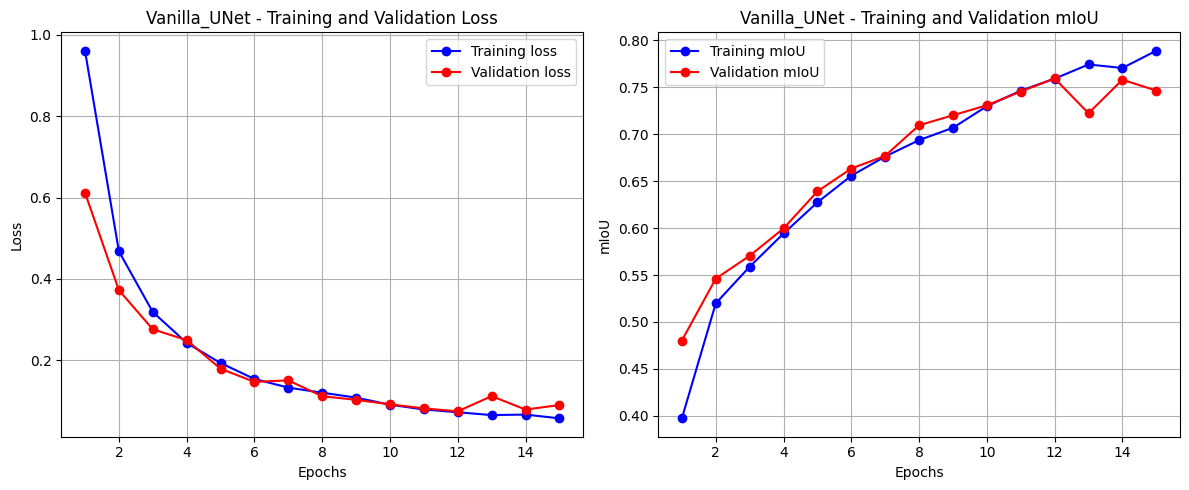

Saved prediction visualization to Vanilla_UNet_test_predictions.png


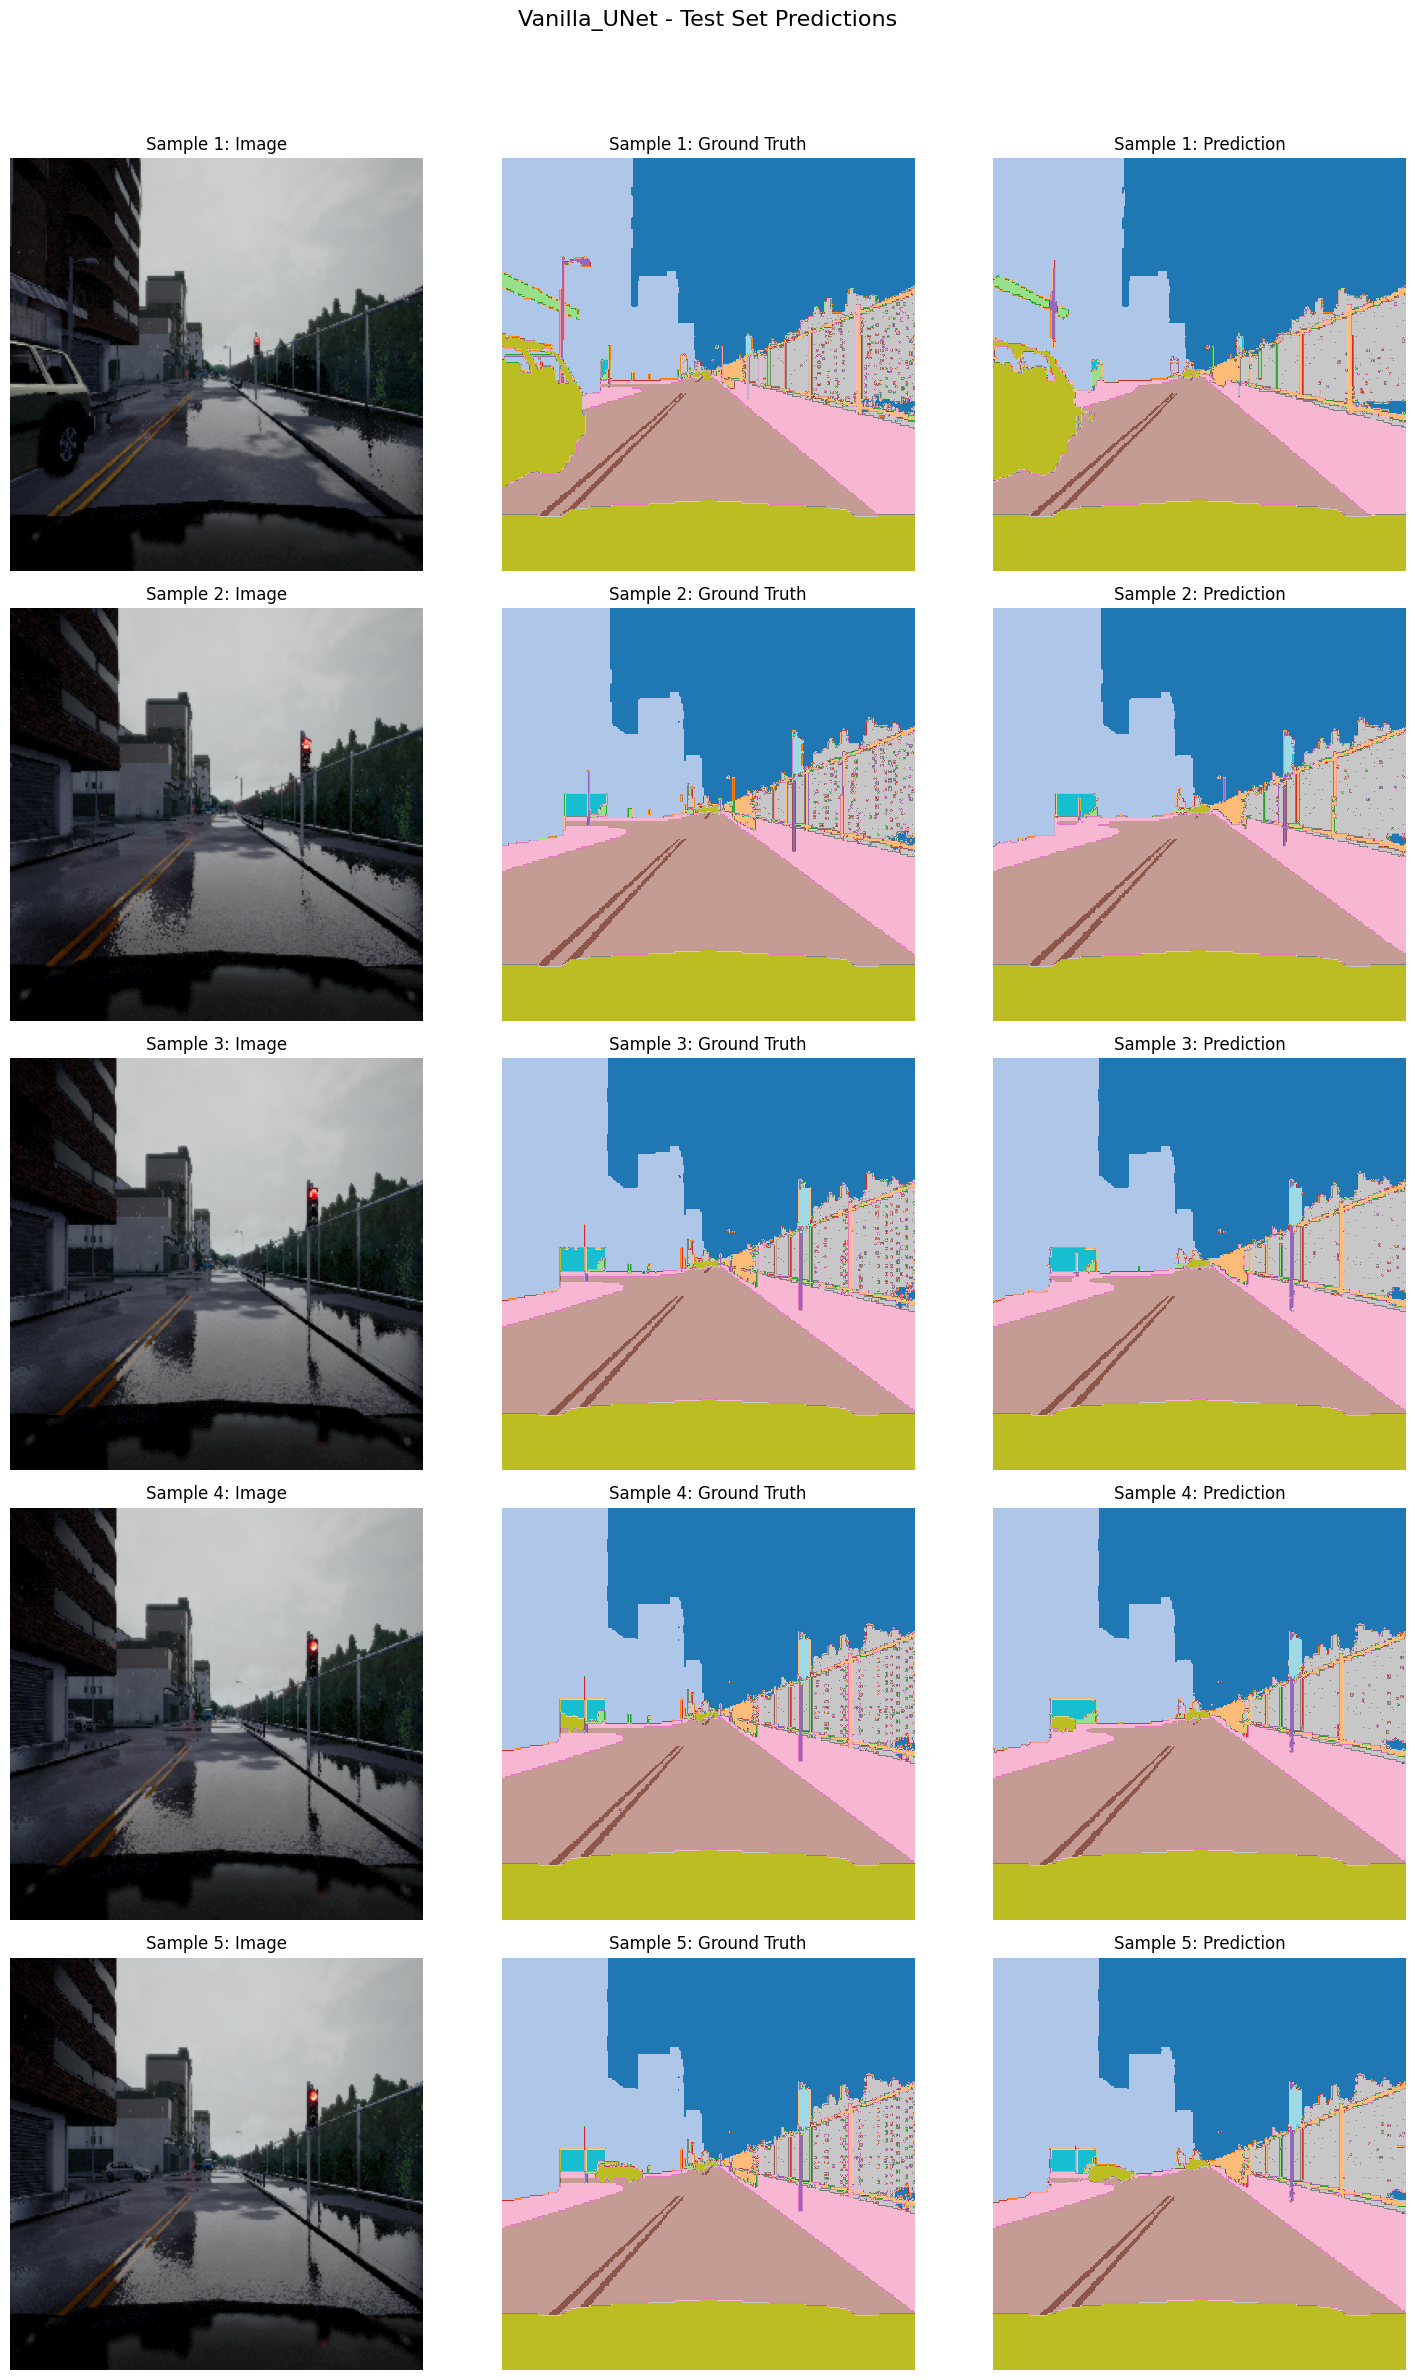


=== Task 3.2: U-Net without Skip Connections ===

--- Training noskip_unet ---


Epoch 1/50 - Train Loss: 1.0094, Train mIoU: 0.4055 | Val Loss: 0.7355, Val mIoU: 0.4567
Validation mIoU improved from -1.0000 to 0.4567
Saved best model to noskip_unet_best.pth (Val mIoU: 0.4567)


Epoch 2/50 - Train Loss: 0.5170, Train mIoU: 0.4748 | Val Loss: 0.4307, Val mIoU: 0.4771
Validation mIoU improved from 0.4567 to 0.4771
Saved best model to noskip_unet_best.pth (Val mIoU: 0.4771)


Epoch 3/50 - Train Loss: 0.3706, Train mIoU: 0.4920 | Val Loss: 0.3296, Val mIoU: 0.5045
Validation mIoU improved from 0.4771 to 0.5045
Saved best model to noskip_unet_best.pth (Val mIoU: 0.5045)


Epoch 4/50 - Train Loss: 0.2894, Train mIoU: 0.5298 | Val Loss: 0.2711, Val mIoU: 0.5423
Validation mIoU improved from 0.5045 to 0.5423
Saved best model to noskip_unet_best.pth (Val mIoU: 0.5423)


Epoch 5/50 - Train Loss: 0.2334, Train mIoU: 0.5864 | Val Loss: 0.2215, Val mIoU: 0.6105
Validation mIoU improved from 0.5423 to 0.6105
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6105)


Epoch 6/50 - Train Loss: 0.1984, Train mIoU: 0.6276 | Val Loss: 0.1953, Val mIoU: 0.6206
Validation mIoU improved from 0.6105 to 0.6206
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6206)


Epoch 7/50 - Train Loss: 0.1774, Train mIoU: 0.6454 | Val Loss: 0.1762, Val mIoU: 0.6456
Validation mIoU improved from 0.6206 to 0.6456
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6456)


Epoch 8/50 - Train Loss: 0.1871, Train mIoU: 0.6442 | Val Loss: 0.4374, Val mIoU: 0.4668
No improvement in validation mIoU for 1 epochs


Epoch 9/50 - Train Loss: 0.2036, Train mIoU: 0.6112 | Val Loss: 0.1700, Val mIoU: 0.6449
No improvement in validation mIoU for 2 epochs


Epoch 10/50 - Train Loss: 0.1442, Train mIoU: 0.6731 | Val Loss: 0.1507, Val mIoU: 0.6622
Validation mIoU improved from 0.6456 to 0.6622
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6622)


Epoch 11/50 - Train Loss: 0.1305, Train mIoU: 0.6891 | Val Loss: 0.1418, Val mIoU: 0.6751
Validation mIoU improved from 0.6622 to 0.6751
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6751)


Epoch 12/50 - Train Loss: 0.1213, Train mIoU: 0.6987 | Val Loss: 0.1346, Val mIoU: 0.6859
Validation mIoU improved from 0.6751 to 0.6859
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6859)


Epoch 13/50 - Train Loss: 0.1143, Train mIoU: 0.7130 | Val Loss: 0.1284, Val mIoU: 0.6986
Validation mIoU improved from 0.6859 to 0.6986
Saved best model to noskip_unet_best.pth (Val mIoU: 0.6986)


Epoch 14/50 - Train Loss: 0.1093, Train mIoU: 0.7227 | Val Loss: 0.1286, Val mIoU: 0.7003
Validation mIoU improved from 0.6986 to 0.7003
Saved best model to noskip_unet_best.pth (Val mIoU: 0.7003)


Epoch 15/50 - Train Loss: 0.1047, Train mIoU: 0.7303 | Val Loss: 0.1253, Val mIoU: 0.7005
No improvement in validation mIoU for 1 epochs


Epoch 16/50 - Train Loss: 0.1014, Train mIoU: 0.7355 | Val Loss: 0.1206, Val mIoU: 0.7061
Validation mIoU improved from 0.7003 to 0.7061
Saved best model to noskip_unet_best.pth (Val mIoU: 0.7061)


Epoch 17/50 - Train Loss: 0.0970, Train mIoU: 0.7431 | Val Loss: 0.1215, Val mIoU: 0.7102
Validation mIoU improved from 0.7061 to 0.7102
Saved best model to noskip_unet_best.pth (Val mIoU: 0.7102)


Epoch 18/50 - Train Loss: 0.0936, Train mIoU: 0.7496 | Val Loss: 0.1183, Val mIoU: 0.7104
No improvement in validation mIoU for 1 epochs


Epoch 19/50 - Train Loss: 0.0911, Train mIoU: 0.7537 | Val Loss: 0.1168, Val mIoU: 0.7233
Validation mIoU improved from 0.7102 to 0.7233
Saved best model to noskip_unet_best.pth (Val mIoU: 0.7233)


Epoch 20/50 - Train Loss: 0.0883, Train mIoU: 0.7593 | Val Loss: 0.1160, Val mIoU: 0.7236
No improvement in validation mIoU for 1 epochs


Epoch 21/50 - Train Loss: 0.0866, Train mIoU: 0.7635 | Val Loss: 0.1149, Val mIoU: 0.7229
No improvement in validation mIoU for 2 epochs


Epoch 22/50 - Train Loss: 0.0847, Train mIoU: 0.7667 | Val Loss: 0.1158, Val mIoU: 0.7224
No improvement in validation mIoU for 3 epochs
Early stopping triggered after 22 epochs
Training stopped early due to convergence. Best Validation mIoU: 0.7233

--- Evaluating No-Skip U-Net on Test Set ---


Test Set Results for No-Skip U-Net:
  Average Loss: 0.1206
  Mean IoU (mIoU): 0.7161
Saved training curves plot to NoSkip_UNet_training_curves.png


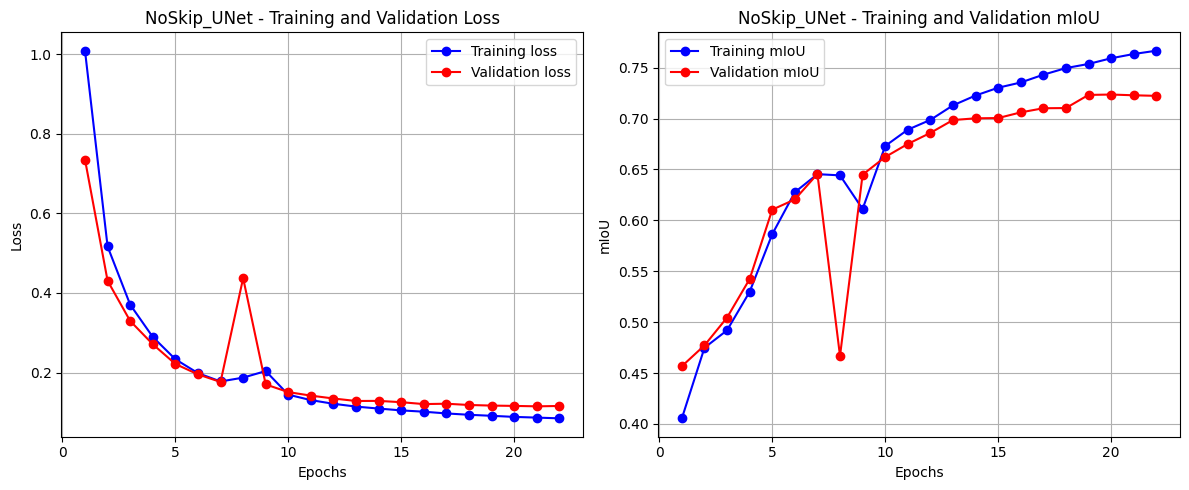

Saved prediction visualization to NoSkip_UNet_test_predictions.png


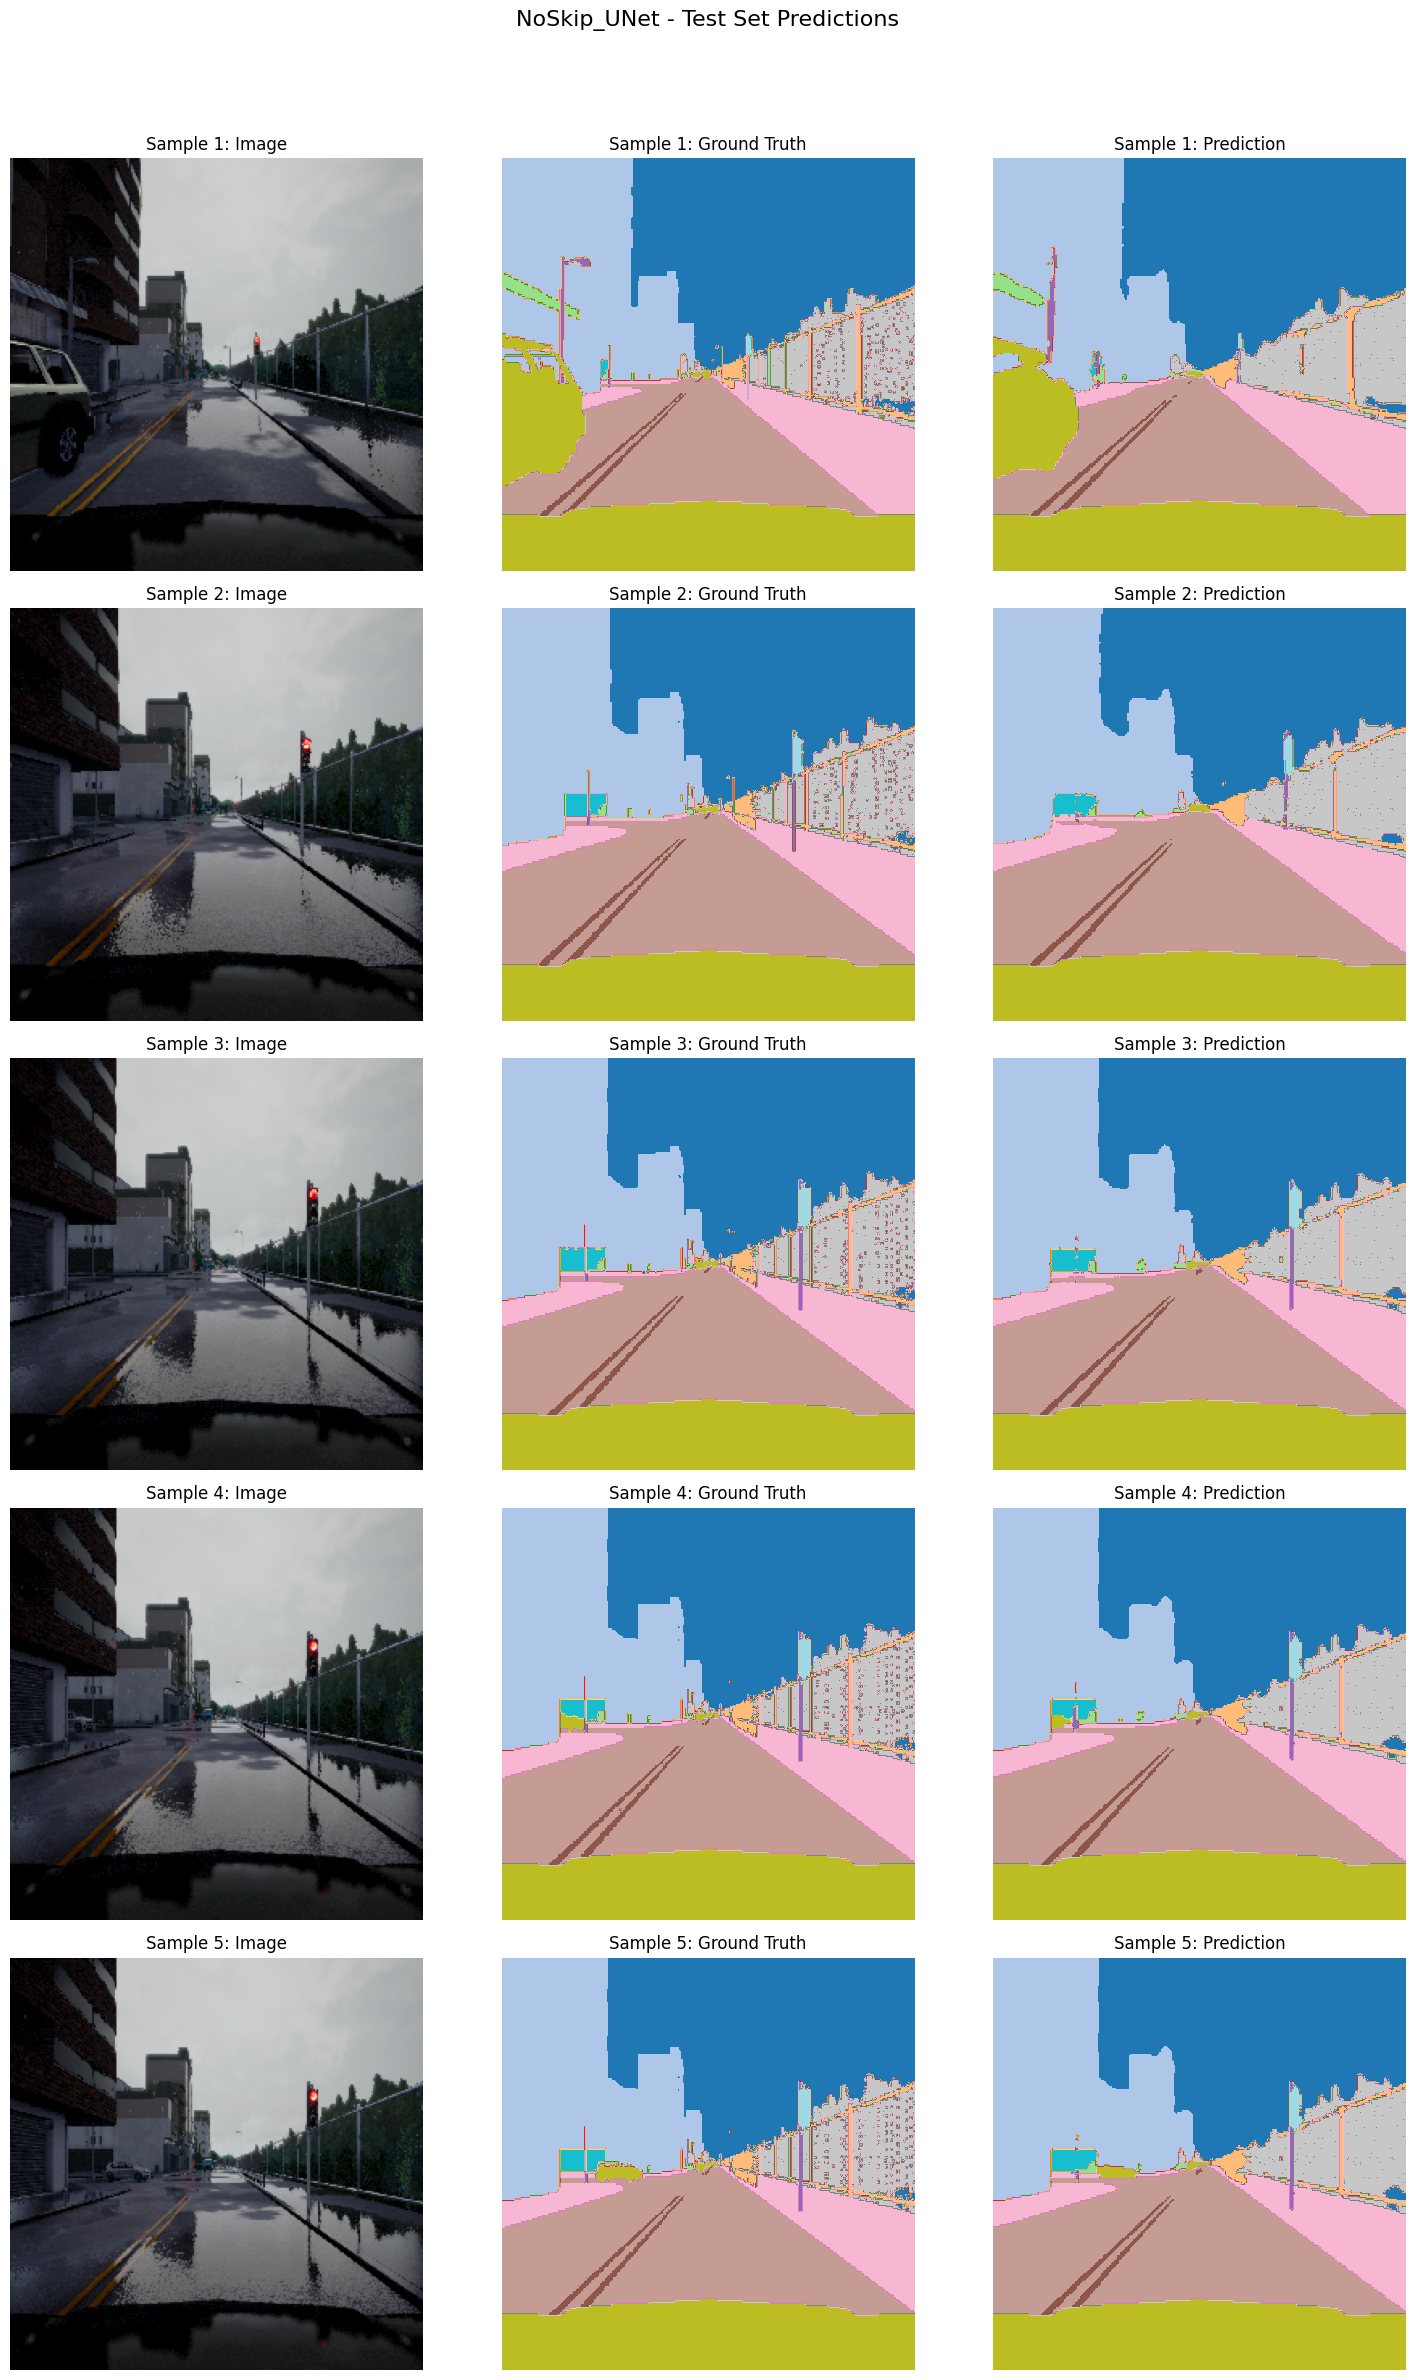


--- Discussion: U-Net without Skip Connections ---
1. Visualized Results Comparison:
   - Compared to the standard U-Net, the model without skip connections often produces much blurrier and less precise segmentation masks.
   - Fine details and sharp boundaries are typically lost because the decoder lacks access to the high-resolution spatial information from the encoder.
   - The model might struggle to localize objects accurately, leading to significant under- or over-segmentation.
2. Importance and Role of Skip Connections:
   - Skip connections are crucial in U-Net because they bridge the semantic gap between the encoder and decoder.
   - They allow the decoder to reuse high-resolution feature maps directly from the corresponding encoder stage.
   - This helps recover fine-grained spatial details that are progressively lost during the downsampling (pooling) operations in the encoder.
   - By combining deep, semantic features (from the decoder path) with shallow, high-resolution fe

Epoch 1/50 - Train Loss: 0.6310, Train mIoU: 0.4243 | Val Loss: 0.3206, Val mIoU: 0.5363
Validation mIoU improved from -1.0000 to 0.5363
Saved best model to residual_unet_best.pth (Val mIoU: 0.5363)


Epoch 2/50 - Train Loss: 0.2485, Train mIoU: 0.5681 | Val Loss: 0.2125, Val mIoU: 0.5881
Validation mIoU improved from 0.5363 to 0.5881
Saved best model to residual_unet_best.pth (Val mIoU: 0.5881)


Epoch 3/50 - Train Loss: 0.1794, Train mIoU: 0.6125 | Val Loss: 0.1668, Val mIoU: 0.6321
Validation mIoU improved from 0.5881 to 0.6321
Saved best model to residual_unet_best.pth (Val mIoU: 0.6321)


Epoch 4/50 - Train Loss: 0.1381, Train mIoU: 0.6494 | Val Loss: 0.1284, Val mIoU: 0.6630
Validation mIoU improved from 0.6321 to 0.6630
Saved best model to residual_unet_best.pth (Val mIoU: 0.6630)


Epoch 5/50 - Train Loss: 0.1144, Train mIoU: 0.6780 | Val Loss: 0.1126, Val mIoU: 0.6852
Validation mIoU improved from 0.6630 to 0.6852
Saved best model to residual_unet_best.pth (Val mIoU: 0.6852)


Epoch 6/50 - Train Loss: 0.0958, Train mIoU: 0.7050 | Val Loss: 0.0936, Val mIoU: 0.7139
Validation mIoU improved from 0.6852 to 0.7139
Saved best model to residual_unet_best.pth (Val mIoU: 0.7139)


Epoch 7/50 - Train Loss: 0.0815, Train mIoU: 0.7312 | Val Loss: 0.0848, Val mIoU: 0.7310
Validation mIoU improved from 0.7139 to 0.7310
Saved best model to residual_unet_best.pth (Val mIoU: 0.7310)


Epoch 8/50 - Train Loss: 0.0710, Train mIoU: 0.7521 | Val Loss: 0.0746, Val mIoU: 0.7558
Validation mIoU improved from 0.7310 to 0.7558
Saved best model to residual_unet_best.pth (Val mIoU: 0.7558)


Epoch 9/50 - Train Loss: 0.0647, Train mIoU: 0.7664 | Val Loss: 0.0843, Val mIoU: 0.7384
No improvement in validation mIoU for 1 epochs


Epoch 10/50 - Train Loss: 0.0603, Train mIoU: 0.7733 | Val Loss: 0.0685, Val mIoU: 0.7580
Validation mIoU improved from 0.7558 to 0.7580
Saved best model to residual_unet_best.pth (Val mIoU: 0.7580)


Epoch 11/50 - Train Loss: 0.0514, Train mIoU: 0.7936 | Val Loss: 0.0610, Val mIoU: 0.7781
Validation mIoU improved from 0.7580 to 0.7781
Saved best model to residual_unet_best.pth (Val mIoU: 0.7781)


Epoch 12/50 - Train Loss: 0.0478, Train mIoU: 0.8024 | Val Loss: 0.0563, Val mIoU: 0.7878
Validation mIoU improved from 0.7781 to 0.7878
Saved best model to residual_unet_best.pth (Val mIoU: 0.7878)


Epoch 13/50 - Train Loss: 0.0439, Train mIoU: 0.8108 | Val Loss: 0.0563, Val mIoU: 0.7909
Validation mIoU improved from 0.7878 to 0.7909
Saved best model to residual_unet_best.pth (Val mIoU: 0.7909)


Epoch 14/50 - Train Loss: 0.0410, Train mIoU: 0.8192 | Val Loss: 0.0527, Val mIoU: 0.7984
Validation mIoU improved from 0.7909 to 0.7984
Saved best model to residual_unet_best.pth (Val mIoU: 0.7984)


Epoch 15/50 - Train Loss: 0.0424, Train mIoU: 0.8198 | Val Loss: 0.7499, Val mIoU: 0.5157
No improvement in validation mIoU for 1 epochs


Epoch 16/50 - Train Loss: 0.0783, Train mIoU: 0.7531 | Val Loss: 0.0580, Val mIoU: 0.7851
No improvement in validation mIoU for 2 epochs


Epoch 17/50 - Train Loss: 0.0389, Train mIoU: 0.8243 | Val Loss: 0.0471, Val mIoU: 0.8132
Validation mIoU improved from 0.7984 to 0.8132
Saved best model to residual_unet_best.pth (Val mIoU: 0.8132)


Epoch 18/50 - Train Loss: 0.0343, Train mIoU: 0.8374 | Val Loss: 0.0464, Val mIoU: 0.8150
Validation mIoU improved from 0.8132 to 0.8150
Saved best model to residual_unet_best.pth (Val mIoU: 0.8150)


Epoch 19/50 - Train Loss: 0.0320, Train mIoU: 0.8452 | Val Loss: 0.0455, Val mIoU: 0.8165
Validation mIoU improved from 0.8150 to 0.8165
Saved best model to residual_unet_best.pth (Val mIoU: 0.8165)


Epoch 20/50 - Train Loss: 0.0309, Train mIoU: 0.8488 | Val Loss: 0.0457, Val mIoU: 0.8155
No improvement in validation mIoU for 1 epochs


Epoch 21/50 - Train Loss: 0.0298, Train mIoU: 0.8522 | Val Loss: 0.0481, Val mIoU: 0.8154
No improvement in validation mIoU for 2 epochs


Epoch 22/50 - Train Loss: 0.0284, Train mIoU: 0.8576 | Val Loss: 0.0443, Val mIoU: 0.8206
Validation mIoU improved from 0.8165 to 0.8206
Saved best model to residual_unet_best.pth (Val mIoU: 0.8206)


Epoch 23/50 - Train Loss: 0.0478, Train mIoU: 0.8098 | Val Loss: 0.0759, Val mIoU: 0.7668
No improvement in validation mIoU for 1 epochs


Epoch 24/50 - Train Loss: 0.0328, Train mIoU: 0.8425 | Val Loss: 0.0420, Val mIoU: 0.8228
Validation mIoU improved from 0.8206 to 0.8228
Saved best model to residual_unet_best.pth (Val mIoU: 0.8228)


Epoch 25/50 - Train Loss: 0.0265, Train mIoU: 0.8638 | Val Loss: 0.0408, Val mIoU: 0.8252
Validation mIoU improved from 0.8228 to 0.8252
Saved best model to residual_unet_best.pth (Val mIoU: 0.8252)


Epoch 26/50 - Train Loss: 0.0247, Train mIoU: 0.8708 | Val Loss: 0.0423, Val mIoU: 0.8249
No improvement in validation mIoU for 1 epochs


Epoch 27/50 - Train Loss: 0.0240, Train mIoU: 0.8717 | Val Loss: 0.0407, Val mIoU: 0.8301
Validation mIoU improved from 0.8252 to 0.8301
Saved best model to residual_unet_best.pth (Val mIoU: 0.8301)


Epoch 28/50 - Train Loss: 0.0229, Train mIoU: 0.8762 | Val Loss: 0.0395, Val mIoU: 0.8308
No improvement in validation mIoU for 1 epochs


Epoch 29/50 - Train Loss: 0.0224, Train mIoU: 0.8782 | Val Loss: 0.0399, Val mIoU: 0.8323
Validation mIoU improved from 0.8301 to 0.8323
Saved best model to residual_unet_best.pth (Val mIoU: 0.8323)


Epoch 30/50 - Train Loss: 0.0219, Train mIoU: 0.8800 | Val Loss: 0.0407, Val mIoU: 0.8310
No improvement in validation mIoU for 1 epochs


Epoch 31/50 - Train Loss: 0.0219, Train mIoU: 0.8804 | Val Loss: 0.0399, Val mIoU: 0.8314
No improvement in validation mIoU for 2 epochs


Epoch 32/50 - Train Loss: 0.0209, Train mIoU: 0.8839 | Val Loss: 0.0396, Val mIoU: 0.8356
Validation mIoU improved from 0.8323 to 0.8356
Saved best model to residual_unet_best.pth (Val mIoU: 0.8356)


Epoch 33/50 - Train Loss: 0.0224, Train mIoU: 0.8767 | Val Loss: 0.0410, Val mIoU: 0.8265
No improvement in validation mIoU for 1 epochs


Epoch 34/50 - Train Loss: 0.0237, Train mIoU: 0.8765 | Val Loss: 0.1561, Val mIoU: 0.6996
No improvement in validation mIoU for 2 epochs


Epoch 35/50 - Train Loss: 0.0717, Train mIoU: 0.7742 | Val Loss: 0.0433, Val mIoU: 0.8178
No improvement in validation mIoU for 3 epochs
Early stopping triggered after 35 epochs
Training stopped early due to convergence. Best Validation mIoU: 0.8356

--- Evaluating Residual U-Net on Test Set ---


Test Set Results for Residual U-Net:
  Average Loss: 0.0406
  Mean IoU (mIoU): 0.8361
Saved training curves plot to Residual_UNet_training_curves.png


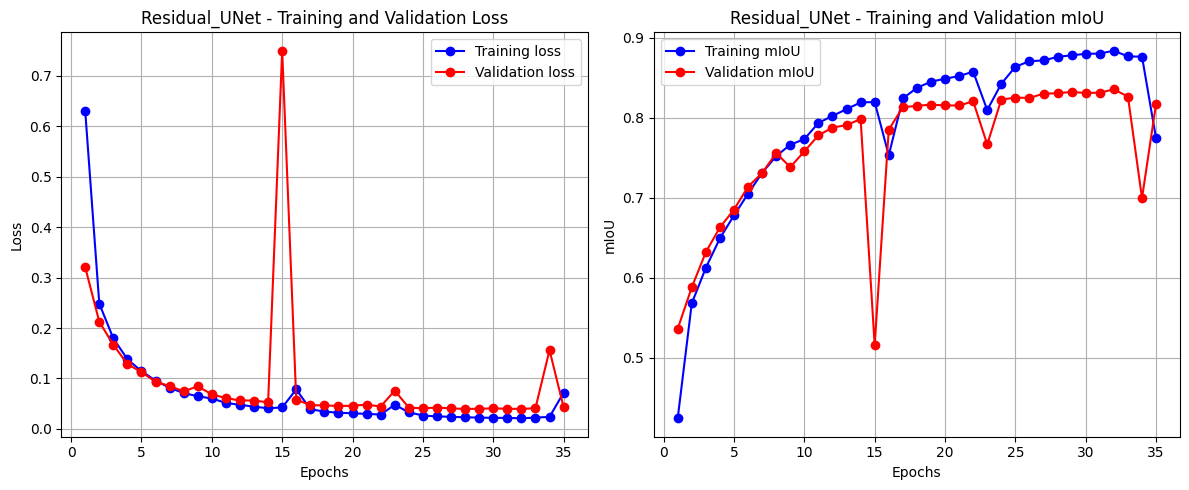

Saved prediction visualization to Residual_UNet_test_predictions.png


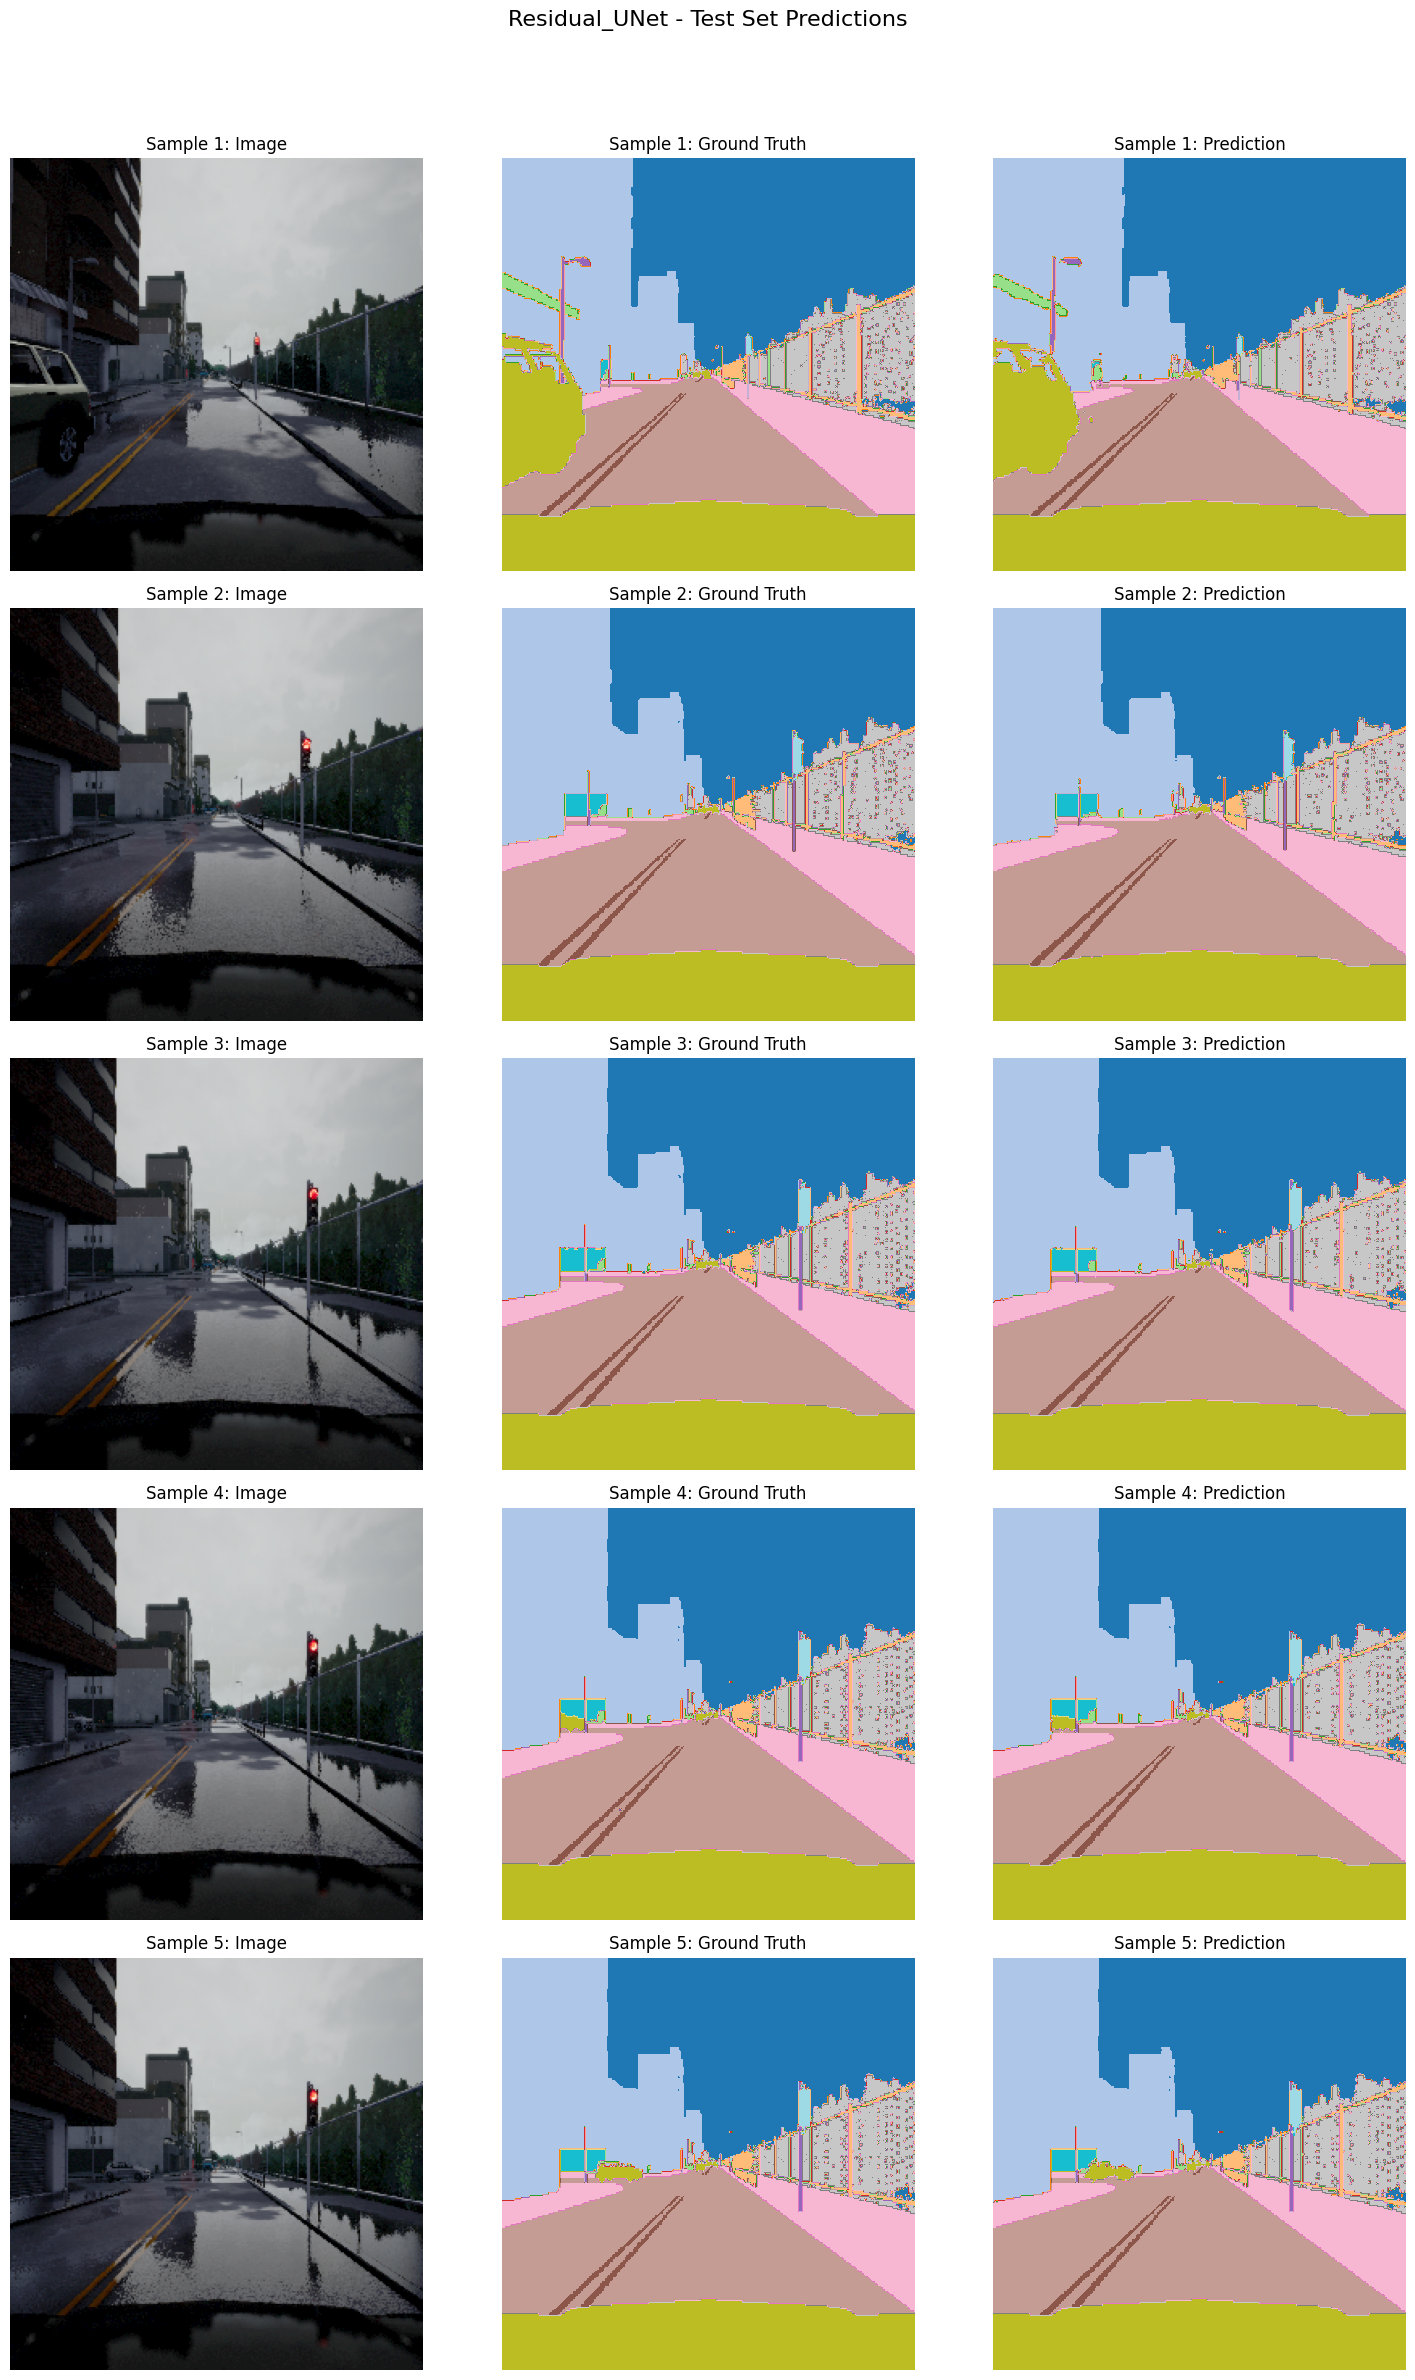


=== Task 3.4: Gated Attention U-Net ===

--- Training attention_unet ---


Epoch 1/50 - Train Loss: 0.8936, Train mIoU: 0.4324 | Val Loss: 0.6512, Val mIoU: 0.4767
Validation mIoU improved from -1.0000 to 0.4767
Saved best model to attention_unet_best.pth (Val mIoU: 0.4767)


Epoch 2/50 - Train Loss: 0.4439, Train mIoU: 0.5386 | Val Loss: 0.3656, Val mIoU: 0.5549
Validation mIoU improved from 0.4767 to 0.5549
Saved best model to attention_unet_best.pth (Val mIoU: 0.5549)


Epoch 3/50 - Train Loss: 0.3018, Train mIoU: 0.5768 | Val Loss: 0.2552, Val mIoU: 0.6000
Validation mIoU improved from 0.5549 to 0.6000
Saved best model to attention_unet_best.pth (Val mIoU: 0.6000)


Epoch 4/50 - Train Loss: 0.2236, Train mIoU: 0.6222 | Val Loss: 0.2008, Val mIoU: 0.6334
Validation mIoU improved from 0.6000 to 0.6334
Saved best model to attention_unet_best.pth (Val mIoU: 0.6334)


Epoch 5/50 - Train Loss: 0.1747, Train mIoU: 0.6504 | Val Loss: 0.1724, Val mIoU: 0.6527
Validation mIoU improved from 0.6334 to 0.6527
Saved best model to attention_unet_best.pth (Val mIoU: 0.6527)


Epoch 6/50 - Train Loss: 0.1445, Train mIoU: 0.6697 | Val Loss: 0.1423, Val mIoU: 0.6633
Validation mIoU improved from 0.6527 to 0.6633
Saved best model to attention_unet_best.pth (Val mIoU: 0.6633)


Epoch 7/50 - Train Loss: 0.1220, Train mIoU: 0.6931 | Val Loss: 0.1395, Val mIoU: 0.6839
Validation mIoU improved from 0.6633 to 0.6839
Saved best model to attention_unet_best.pth (Val mIoU: 0.6839)


Epoch 8/50 - Train Loss: 0.1171, Train mIoU: 0.7034 | Val Loss: 0.1602, Val mIoU: 0.6601
No improvement in validation mIoU for 1 epochs


Epoch 9/50 - Train Loss: 0.1024, Train mIoU: 0.7197 | Val Loss: 0.0946, Val mIoU: 0.7352
Validation mIoU improved from 0.6839 to 0.7352
Saved best model to attention_unet_best.pth (Val mIoU: 0.7352)


Epoch 10/50 - Train Loss: 0.0808, Train mIoU: 0.7536 | Val Loss: 0.0822, Val mIoU: 0.7565
Validation mIoU improved from 0.7352 to 0.7565
Saved best model to attention_unet_best.pth (Val mIoU: 0.7565)


Epoch 11/50 - Train Loss: 0.0759, Train mIoU: 0.7664 | Val Loss: 0.1471, Val mIoU: 0.6958
No improvement in validation mIoU for 1 epochs


Epoch 12/50 - Train Loss: 0.0849, Train mIoU: 0.7471 | Val Loss: 0.0735, Val mIoU: 0.7676
Validation mIoU improved from 0.7565 to 0.7676
Saved best model to attention_unet_best.pth (Val mIoU: 0.7676)


Epoch 13/50 - Train Loss: 0.0622, Train mIoU: 0.7851 | Val Loss: 0.0663, Val mIoU: 0.7765
Validation mIoU improved from 0.7676 to 0.7765
Saved best model to attention_unet_best.pth (Val mIoU: 0.7765)


Epoch 14/50 - Train Loss: 0.0558, Train mIoU: 0.7967 | Val Loss: 0.0672, Val mIoU: 0.7782
Validation mIoU improved from 0.7765 to 0.7782
Saved best model to attention_unet_best.pth (Val mIoU: 0.7782)


Epoch 15/50 - Train Loss: 0.0512, Train mIoU: 0.8061 | Val Loss: 0.0581, Val mIoU: 0.7950
Validation mIoU improved from 0.7782 to 0.7950
Saved best model to attention_unet_best.pth (Val mIoU: 0.7950)


Epoch 16/50 - Train Loss: 0.0470, Train mIoU: 0.8149 | Val Loss: 0.0560, Val mIoU: 0.8000
Validation mIoU improved from 0.7950 to 0.8000
Saved best model to attention_unet_best.pth (Val mIoU: 0.8000)


Epoch 17/50 - Train Loss: 0.0461, Train mIoU: 0.8158 | Val Loss: 0.0569, Val mIoU: 0.7990
No improvement in validation mIoU for 1 epochs


Epoch 18/50 - Train Loss: 0.0431, Train mIoU: 0.8229 | Val Loss: 0.0592, Val mIoU: 0.7927
No improvement in validation mIoU for 2 epochs


Epoch 19/50 - Train Loss: 0.0405, Train mIoU: 0.8282 | Val Loss: 0.0497, Val mIoU: 0.8088
Validation mIoU improved from 0.8000 to 0.8088
Saved best model to attention_unet_best.pth (Val mIoU: 0.8088)


Epoch 20/50 - Train Loss: 0.0396, Train mIoU: 0.8299 | Val Loss: 0.0491, Val mIoU: 0.8112
Validation mIoU improved from 0.8088 to 0.8112
Saved best model to attention_unet_best.pth (Val mIoU: 0.8112)


Epoch 21/50 - Train Loss: 0.0371, Train mIoU: 0.8383 | Val Loss: 0.0929, Val mIoU: 0.7466
No improvement in validation mIoU for 1 epochs


Epoch 22/50 - Train Loss: 0.0937, Train mIoU: 0.7388 | Val Loss: 0.0593, Val mIoU: 0.7874
No improvement in validation mIoU for 2 epochs


Epoch 23/50 - Train Loss: 0.0405, Train mIoU: 0.8245 | Val Loss: 0.0472, Val mIoU: 0.8142
Validation mIoU improved from 0.8112 to 0.8142
Saved best model to attention_unet_best.pth (Val mIoU: 0.8142)


Epoch 24/50 - Train Loss: 0.0347, Train mIoU: 0.8415 | Val Loss: 0.0438, Val mIoU: 0.8234
Validation mIoU improved from 0.8142 to 0.8234
Saved best model to attention_unet_best.pth (Val mIoU: 0.8234)


Epoch 25/50 - Train Loss: 0.0322, Train mIoU: 0.8498 | Val Loss: 0.0432, Val mIoU: 0.8256
Validation mIoU improved from 0.8234 to 0.8256
Saved best model to attention_unet_best.pth (Val mIoU: 0.8256)


Epoch 26/50 - Train Loss: 0.0315, Train mIoU: 0.8525 | Val Loss: 0.0432, Val mIoU: 0.8242
No improvement in validation mIoU for 1 epochs


Epoch 27/50 - Train Loss: 0.0296, Train mIoU: 0.8576 | Val Loss: 0.0413, Val mIoU: 0.8290
Validation mIoU improved from 0.8256 to 0.8290
Saved best model to attention_unet_best.pth (Val mIoU: 0.8290)


Epoch 28/50 - Train Loss: 0.0283, Train mIoU: 0.8610 | Val Loss: 0.0411, Val mIoU: 0.8301
Validation mIoU improved from 0.8290 to 0.8301
Saved best model to attention_unet_best.pth (Val mIoU: 0.8301)


Epoch 29/50 - Train Loss: 0.0274, Train mIoU: 0.8632 | Val Loss: 0.0407, Val mIoU: 0.8311
No improvement in validation mIoU for 1 epochs


Epoch 30/50 - Train Loss: 0.0271, Train mIoU: 0.8645 | Val Loss: 0.0412, Val mIoU: 0.8291
No improvement in validation mIoU for 2 epochs


Epoch 31/50 - Train Loss: 0.0266, Train mIoU: 0.8649 | Val Loss: 0.0396, Val mIoU: 0.8331
Validation mIoU improved from 0.8301 to 0.8331
Saved best model to attention_unet_best.pth (Val mIoU: 0.8331)


Epoch 32/50 - Train Loss: 0.0251, Train mIoU: 0.8706 | Val Loss: 0.0390, Val mIoU: 0.8344
Validation mIoU improved from 0.8331 to 0.8344
Saved best model to attention_unet_best.pth (Val mIoU: 0.8344)


Epoch 33/50 - Train Loss: 0.0274, Train mIoU: 0.8644 | Val Loss: 0.0704, Val mIoU: 0.7694
No improvement in validation mIoU for 1 epochs


Epoch 34/50 - Train Loss: 0.0570, Train mIoU: 0.7992 | Val Loss: 0.0701, Val mIoU: 0.7627
No improvement in validation mIoU for 2 epochs


Epoch 35/50 - Train Loss: 0.0352, Train mIoU: 0.8387 | Val Loss: 0.0389, Val mIoU: 0.8335
No improvement in validation mIoU for 3 epochs
Early stopping triggered after 35 epochs
Training stopped early due to convergence. Best Validation mIoU: 0.8344

--- Evaluating Attention U-Net on Test Set ---


Test Set Results for Attention U-Net:
  Average Loss: 0.0402
  Mean IoU (mIoU): 0.8352
Saved training curves plot to Attention_UNet_training_curves.png


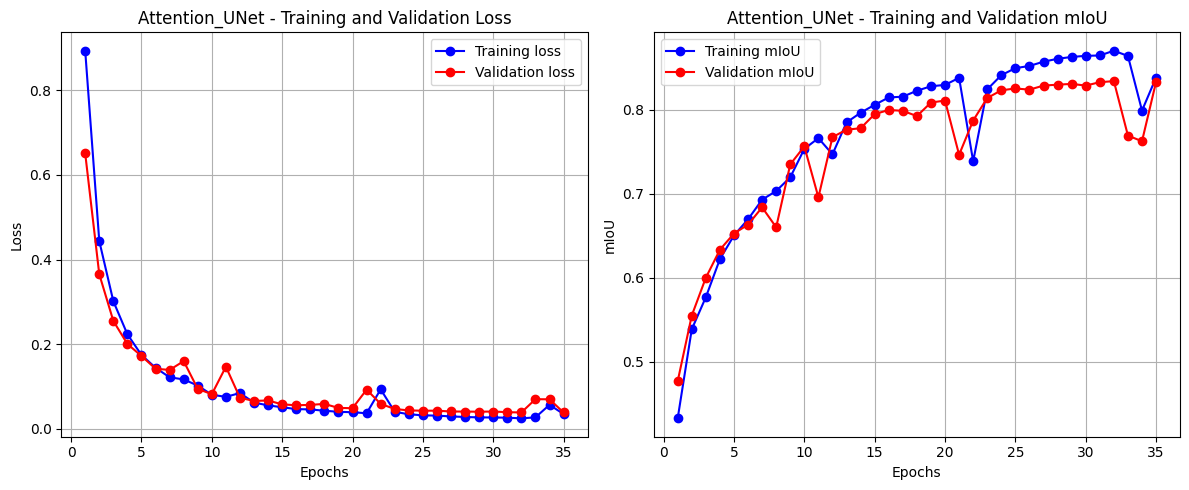

Saved prediction visualization to Attention_UNet_test_predictions.png


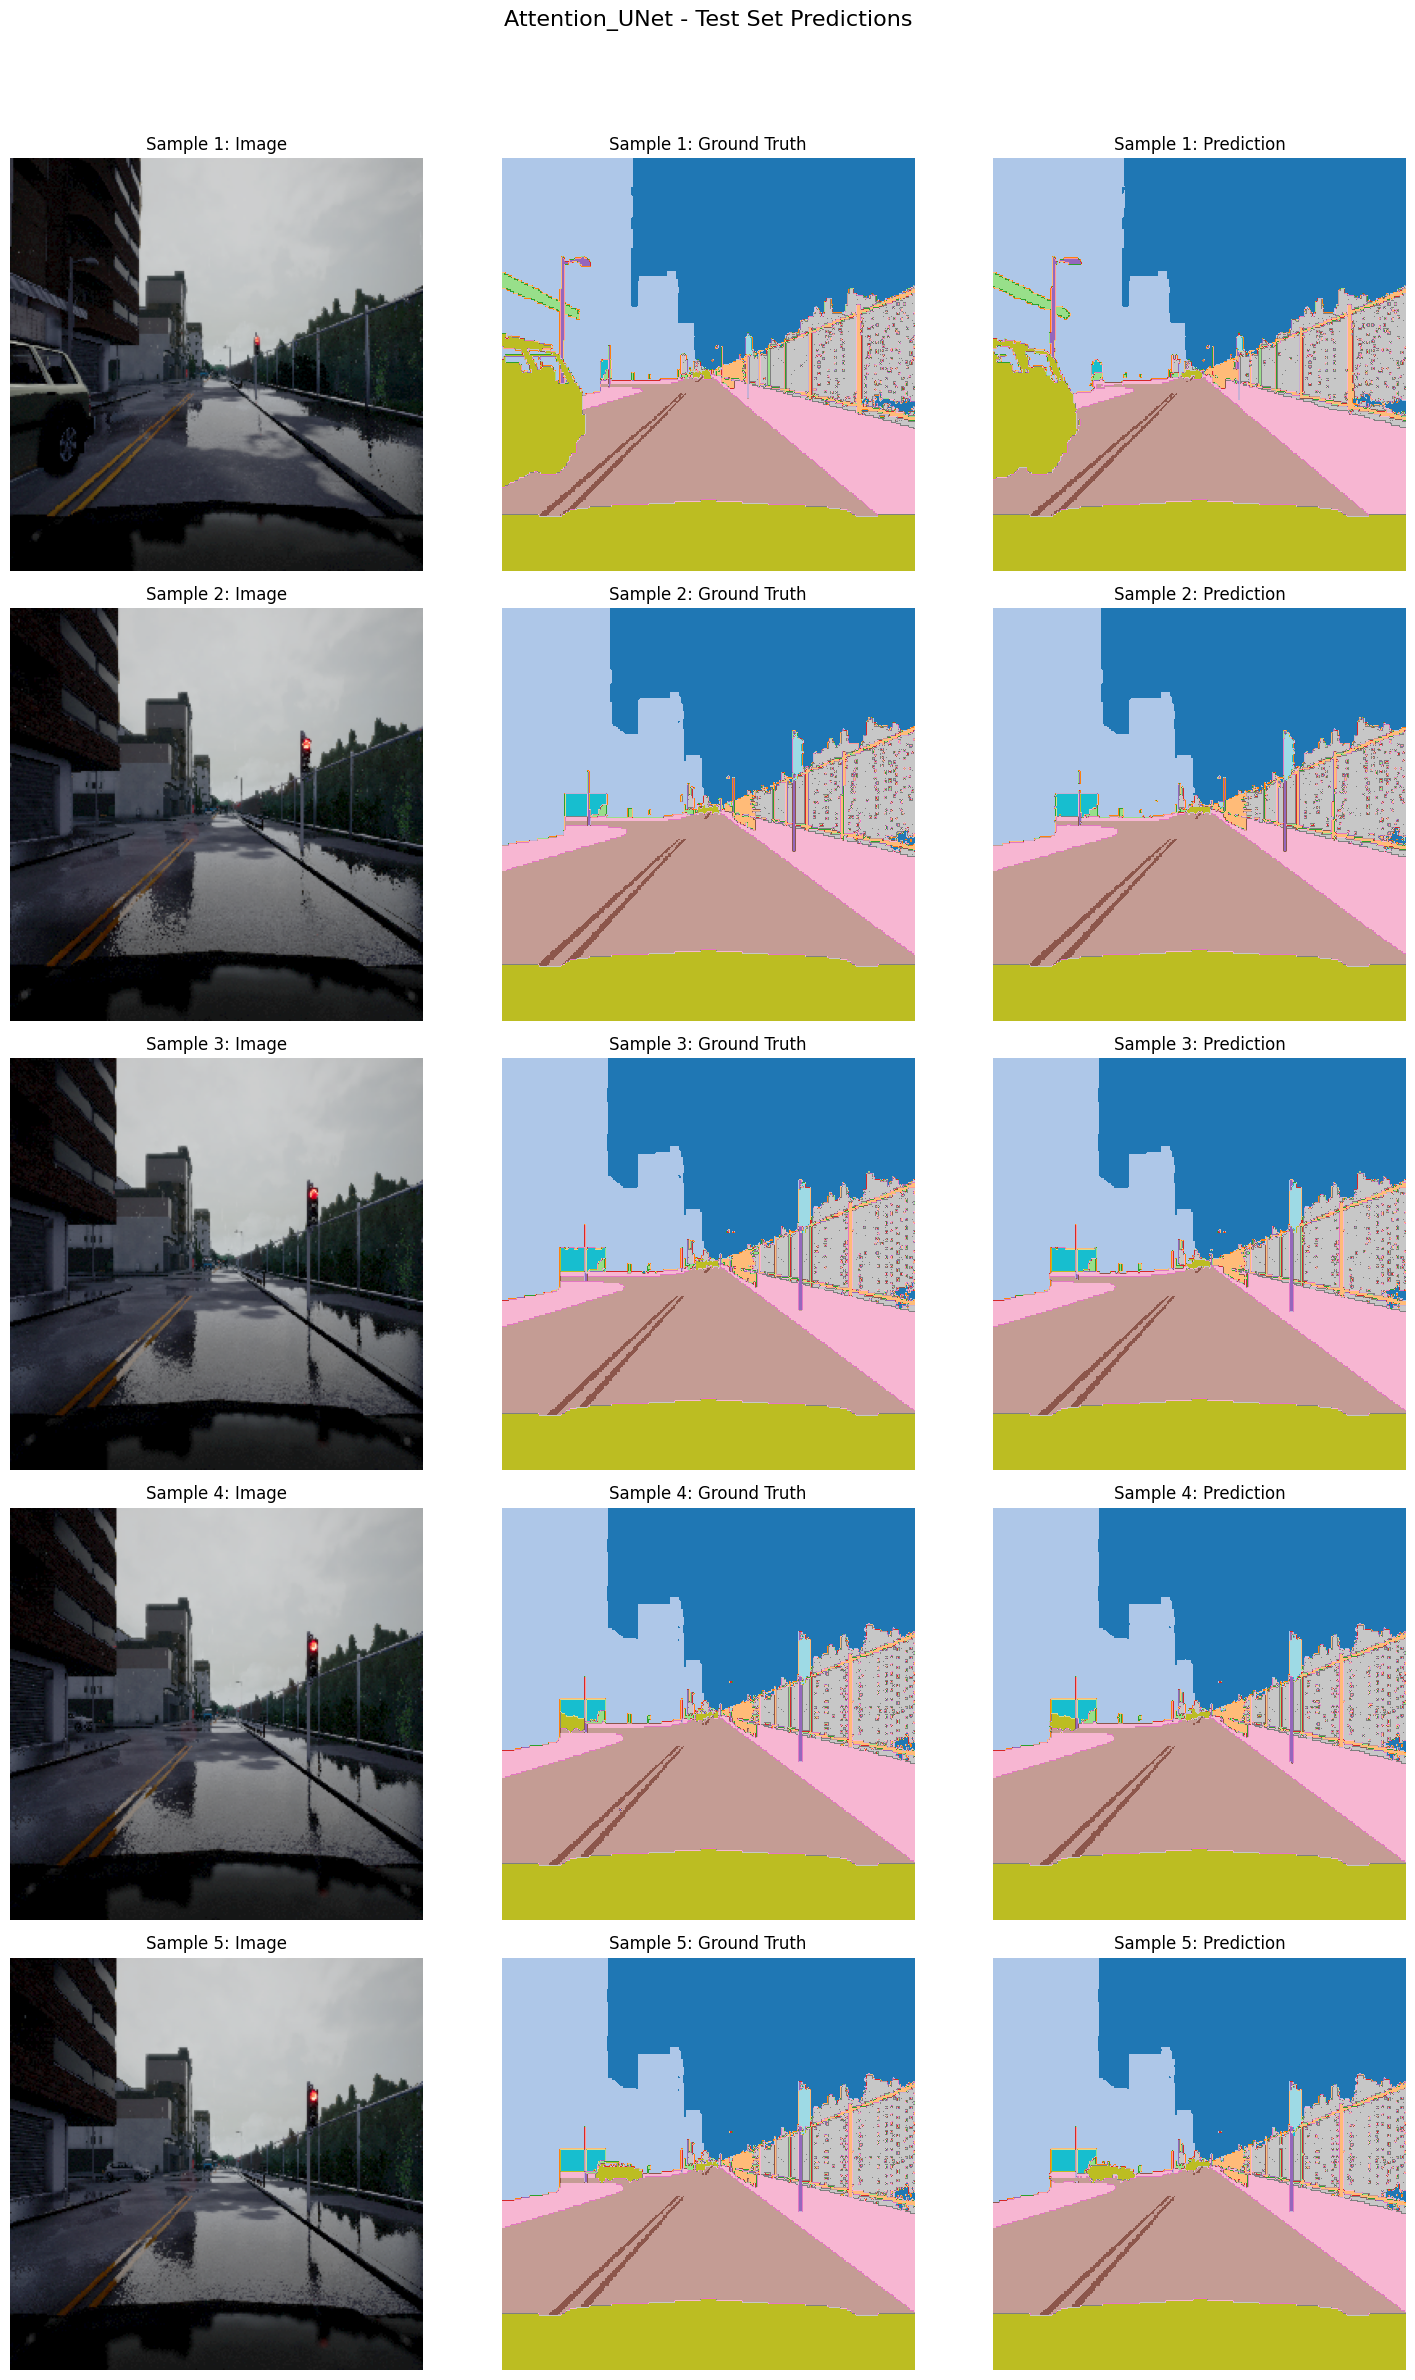


--- Discussion: Gated Attention U-Net ---
1. Advantages of Attention Gates (as per paper):
   - Attention Gates (AGs) learn to suppress irrelevant regions in the input image while highlighting salient features useful for the specific task.
   - They progressively suppress feature responses in irrelevant background regions without requiring explicit external tissue/organ localization modules.
   - AGs can be easily integrated into standard CNN architectures like U-Net with minimal computational overhead.
   - They improve model sensitivity and accuracy for segmenting varying shapes and sizes of target structures.
2. How Gating Signal Helps:
   - The gating signal, typically from a deeper layer of the network, provides contextual information to guide the attention mechanism.
   - It helps the AG focus on relevant spatial regions within the feature maps passed through the skip connection.
   - By using the gating signal, the AG learns to selectively pass features from the skip connection

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn.functional as F

# --- Configuration ---
DATASET_PATH = "/kaggle/input/question-1-2/seg_dataset_256/dataset_256"
IMAGE_SIZE = 256
BATCH_SIZE = 8  # Increased from 4, adjust based on your specific GPU memory
NUM_EPOCHS = 50 # Maximum epochs (will stop earlier if converged)
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.1 # 10% for validation
NUM_CLASSES = 13 # Multiclass segmentation (indices 0-12 found)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
PATIENCE = 3 # Number of epochs to wait for improvement before stopping
MIN_DELTA = 0.001  # Minimum change to qualify as improvement

# Set random seeds for reproducibility
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

print(f"Using device: {DEVICE}")
print(f"Dataset path: {DATASET_PATH}")

# --- Dataset ---
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, mask_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_filenames = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.mask_filenames = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])
        self.transform = transform
        self.mask_transform = mask_transform

        # Ensure images and masks correspond
        assert len(self.image_filenames) == len(self.mask_filenames), \
            f"Number of images ({len(self.image_filenames)}) and masks ({len(self.mask_filenames)}) do not match."
        for img_f, mask_f in zip(self.image_filenames, self.mask_filenames):
             # Basic check assuming filenames match (e.g., img_01.png, mask_01.png)
             # Adjust this check if naming convention is different
             img_base = os.path.splitext(img_f)[0]
             mask_base = os.path.splitext(mask_f)[0]
             # Example check: if mask filename needs prefix/suffix removed
             # assert img_base == mask_base.replace('_mask', ''), f"Mismatch: {img_f}, {mask_f}"
             assert img_base == mask_base, f"Image and mask filenames might not correspond: {img_f}, {mask_f}"


    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_filenames[idx])

        image = Image.open(img_path).convert("RGB") # Assuming input images are RGB
        mask = Image.open(mask_path).convert("RGB") # Load as RGB

        if self.transform:
            image = self.transform(image)

        # Always process the mask to a tensor regardless of mask_transform
        # Resize using PIL first
        resizer = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE), interpolation=transforms.InterpolationMode.NEAREST)
        mask = resizer(mask)

        # Convert to numpy, extract class index (assuming Red channel)
        mask_np = np.array(mask)
        mask_indices = mask_np[:, :, 0] # Assuming class index is in the Red channel

        # Convert indices to tensor
        mask = torch.from_numpy(mask_indices).long() # Convert to LongTensor

        return image, mask

# Define transforms
# Input images: Normalize based on typical ImageNet stats or calculate from dataset
img_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Example normalization
])

# Masks: Only resize needed here, ToTensor conversion handled in __getitem__
# Using NEAREST interpolation is crucial for masks to avoid creating new class values
mask_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE), interpolation=transforms.InterpolationMode.NEAREST)
])
# Note: The actual conversion to tensor and extraction of class index
# is now handled within the Dataset's __getitem__ method.
# We pass None to the mask_transform argument in the Dataset constructor now.


# --- Metrics ---
def calculate_miou(pred_logits, true_mask, num_classes, smooth=1e-6):
    pred_mask = torch.argmax(pred_logits, dim=1) # Get predicted class index per pixel
    true_mask = true_mask.long() # Ensure true mask is Long

    iou_per_class = []
    # Calculate IoU for each class (excluding background if desired, but usually included)
    for cls in range(num_classes):
        pred_inds = (pred_mask == cls)
        target_inds = (true_mask == cls)

        intersection = (pred_inds & target_inds).sum((1, 2)) # Sum over H, W
        union = (pred_inds | target_inds).sum((1, 2)) # Sum over H, W

        # Handle cases where a class is not present in true_mask or pred_mask
        # If union is 0, IoU is 1 if intersection is also 0 (correctly predicted absence)
        # If union is 0 but intersection is not (impossible), treat as 0 IoU
        # If union is > 0, calculate IoU
        iou = torch.where(union == 0,
                          torch.tensor(1.0, device=pred_logits.device),
                          (intersection.float() + smooth) / (union.float() + smooth))

        iou_per_class.append(iou)

    # Stack IoUs for each class (batch_size, num_classes)
    iou_per_class = torch.stack(iou_per_class, dim=1)

    # Calculate mean IoU across classes for each sample in the batch, then average over batch
    # Often, mIoU excludes background class (class 0) if specified by task, but here we average all
    miou = torch.mean(iou_per_class) # Mean over all classes and batch samples
    return miou.item()

# --- Plotting ---
def plot_curves(history, title_prefix):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title(f'{title_prefix} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_miou'], 'bo-', label='Training mIoU')
    plt.plot(epochs, history['val_miou'], 'ro-', label='Validation mIoU')
    plt.title(f'{title_prefix} - Training and Validation mIoU')
    plt.xlabel('Epochs')
    plt.ylabel('mIoU')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{title_prefix}_training_curves.png")
    print(f"Saved training curves plot to {title_prefix}_training_curves.png")
    plt.show()  # Display plot after saving

# --- Visualization ---
def visualize_predictions(model, dataloader, device, num_samples=5, title_prefix=""):
    model.eval()
    samples_shown = 0
    plt.figure(figsize=(15, num_samples * 5))

    with torch.no_grad():
        for i, (images, masks) in enumerate(dataloader):
            if samples_shown >= num_samples:
                break

            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            # For multiclass, get predicted class index
            preds = torch.argmax(outputs, dim=1)

            for j in range(images.size(0)):
                if samples_shown >= num_samples:
                    break

                img_np = images[j].cpu().numpy().transpose(1, 2, 0)
                # Unnormalize image for display
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img_np = std * img_np + mean
                img_np = np.clip(img_np, 0, 1)

                mask_np = masks[j].cpu().numpy().squeeze()
                pred_np = preds[j].cpu().numpy().squeeze() # Already class indices

                plt.subplot(num_samples, 3, samples_shown * 3 + 1)
                plt.imshow(img_np)
                plt.title(f"Sample {samples_shown+1}: Image")
                plt.axis('off')

                plt.subplot(num_samples, 3, samples_shown * 3 + 2)
                plt.imshow(mask_np, cmap='tab20', vmin=0, vmax=NUM_CLASSES-1) # Use a colormap suitable for more classes (e.g., tab20)
                plt.title(f"Sample {samples_shown+1}: Ground Truth")
                plt.axis('off')

                plt.subplot(num_samples, 3, samples_shown * 3 + 3)
                plt.imshow(pred_np, cmap='tab20', vmin=0, vmax=NUM_CLASSES-1) # Use a colormap suitable for more classes (e.g., tab20)
                plt.title(f"Sample {samples_shown+1}: Prediction")
                plt.axis('off')

                samples_shown += 1

    plt.suptitle(f"{title_prefix} - Test Set Predictions", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.savefig(f"{title_prefix}_test_predictions.png")
    print(f"Saved prediction visualization to {title_prefix}_test_predictions.png")
    plt.show()  # Display plot after saving


# --- Model Components ---

class ConvBlock(nn.Module):
    """Standard Convolutional Block: Conv -> BN -> ReLU -> Conv -> BN -> ReLU"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class ResidualConvBlock(nn.Module):
    """Residual Convolutional Block"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        self.relu = nn.ReLU(inplace=True)

        # Skip connection: 1x1 conv if channels change, identity otherwise
        if in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.skip = nn.Identity()

    def forward(self, x):
        identity = self.skip(x)
        out = self.conv1(x)
        out = self.conv2(out)
        out += identity # Add skip connection
        out = self.relu(out)
        return out

class AttentionGate(nn.Module):
    """Additive Attention Gate"""
    def __init__(self, F_g, F_l, F_int):
        super().__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )
        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )
        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )
        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        # g: gating signal from deeper layer
        # x: input from skip connection (encoder)
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        # Multiply attention coefficients with input features (x)
        return x * psi


# --- U-Net Model ---
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],
                 use_skip_connections=True, use_residual_blocks=False, use_attention_gates=False):
        super().__init__()
        self.use_skip_connections = use_skip_connections
        self.use_attention_gates = use_attention_gates
        self.downs = nn.ModuleList()
        self.ups = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        CurrentConvBlock = ResidualConvBlock if use_residual_blocks else ConvBlock

        # Encoder (Downsampling path)
        for feature in features:
            self.downs.append(CurrentConvBlock(in_channels, feature))
            in_channels = feature

        # Bottleneck
        self.bottleneck = CurrentConvBlock(features[-1], features[-1] * 2)

        # Decoder (Upsampling path)
        reversed_features = features[::-1]
        for i in range(len(reversed_features)):
            # Transposed Convolution
            self.ups.append(
                nn.ConvTranspose2d(
                    reversed_features[i] * 2, reversed_features[i], kernel_size=2, stride=2
                )
            )
            # Attention Gate (if enabled)
            if use_attention_gates:
                 # F_g (gating signal from below), F_l (skip connection from encoder), F_int (intermediate channels)
                 # F_g = channels from up-conv output = reversed_features[i]
                 # F_l = channels from corresponding encoder layer = reversed_features[i]
                 # F_int can be F_l / 2 or F_l, let's use F_l / 2 as often done
                 F_int = reversed_features[i] // 2
                 self.ups.append(AttentionGate(F_g=reversed_features[i], F_l=reversed_features[i], F_int=F_int))

            # Convolutional Block
            # Input channels: channels from up-conv + channels from skip connection (if used)
            conv_in_channels = reversed_features[i] * 2 if use_skip_connections else reversed_features[i]
            self.ups.append(CurrentConvBlock(conv_in_channels, reversed_features[i]))


        # Final Convolution
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        # Encoder
        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        # Bottleneck
        x = self.bottleneck(x)

        # Decoder
        skip_connections = skip_connections[::-1] # Reverse for decoder
        up_idx = 0
        for i in range(0, len(self.ups), 2 if not self.use_attention_gates else 3): # Step by 2 (upconv, conv) or 3 (upconv, att, conv)
            # Up-convolution
            up_conv = self.ups[up_idx]
            x = up_conv(x)
            up_idx += 1

            # Get corresponding skip connection
            skip = skip_connections[i // (2 if not self.use_attention_gates else 3)]

            # Apply Attention Gate (if enabled)
            if self.use_attention_gates:
                att_gate = self.ups[up_idx]
                skip = att_gate(g=x, x=skip) # Apply attention to skip connection
                up_idx += 1

            # Concatenate or just use up-sampled feature if no skips
            if self.use_skip_connections:
                 # Ensure spatial dimensions match (might need padding/cropping if not exact)
                 if x.shape != skip.shape:
                     # Simple center crop or padding - adjust if needed
                     target_size = x.shape[2:]
                     skip = transforms.functional.center_crop(skip, target_size)
                     # Alternatively, use F.interpolate for resizing x
                     # x = F.interpolate(x, size=skip.shape[2:], mode='bilinear', align_corners=False)

                 x = torch.cat((skip, x), dim=1)
            # else: skip connection is ignored

            # Convolutional Block
            conv_block = self.ups[up_idx]
            x = conv_block(x)
            up_idx += 1


        # Final output layer
        return self.final_conv(x)


# --- Training Loop ---
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, model_name, patience=PATIENCE, min_delta=MIN_DELTA):
    history = {'train_loss': [], 'val_loss': [], 'train_miou': [], 'val_miou': []}
    best_val_miou = -1.0
    best_val_loss = float('inf')
    best_model_path = f"{model_name}_best.pth"
    
    # Early stopping counters
    counter = 0
    early_stop = False

    print(f"\n--- Training {model_name} ---")
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_miou = 0.0
        train_progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)

        for images, masks in train_progress:
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            with torch.no_grad(): # Calculate mIoU without gradients
                 miou = calculate_miou(outputs, masks, NUM_CLASSES) # Pass logits directly
            running_miou += miou * images.size(0)

            train_progress.set_postfix({'loss': loss.item(), 'mIoU': miou})

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_miou = running_miou / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)
        history['train_miou'].append(epoch_train_miou)

        # Validation
        model.eval()
        val_loss = 0.0
        val_miou = 0.0
        val_progress = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for images, masks in val_progress:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)
                miou = calculate_miou(outputs, masks, NUM_CLASSES) # Pass logits directly
                val_miou += miou * images.size(0)
                val_progress.set_postfix({'loss': loss.item(), 'mIoU': miou})

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_miou = val_miou / len(val_loader.dataset)
        history['val_loss'].append(epoch_val_loss)
        history['val_miou'].append(epoch_val_miou)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {epoch_train_loss:.4f}, Train mIoU: {epoch_train_miou:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f}, Val mIoU: {epoch_val_miou:.4f}")

        # Check for improvement
        if epoch_val_miou > best_val_miou + min_delta:
            print(f"Validation mIoU improved from {best_val_miou:.4f} to {epoch_val_miou:.4f}")
            best_val_miou = epoch_val_miou
            torch.save(model.state_dict(), best_model_path)
            print(f"Saved best model to {best_model_path} (Val mIoU: {best_val_miou:.4f})")
            counter = 0  # Reset counter
        else:
            counter += 1
            print(f"No improvement in validation mIoU for {counter} epochs")
            
        # Check if early stopping criteria is met
        if counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            early_stop = True
            break

    if early_stop:
        print(f"Training stopped early due to convergence. Best Validation mIoU: {best_val_miou:.4f}")
    else:
        print(f"Reached maximum epochs. Best Validation mIoU: {best_val_miou:.4f}")
        
    # Load best model weights for final evaluation
    model.load_state_dict(torch.load(best_model_path))
    return model, history


# --- Evaluation Loop ---
def evaluate_model(model, test_loader, criterion, device, model_name):
    model.eval()
    test_loss = 0.0
    test_miou = 0.0
    print(f"\n--- Evaluating {model_name} on Test Set ---")
    progress = tqdm(test_loader, desc="Evaluating", leave=False)
    with torch.no_grad():
        for images, masks in progress:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            test_loss += loss.item() * images.size(0)
            test_miou += calculate_miou(outputs, masks, NUM_CLASSES) * images.size(0)
            progress.set_postfix({'loss': loss.item(), 'mIoU': test_miou / len(test_loader.dataset)})

    final_test_loss = test_loss / len(test_loader.dataset)
    final_test_miou = test_miou / len(test_loader.dataset)

    print(f"Test Set Results for {model_name}:")
    print(f"  Average Loss: {final_test_loss:.4f}")
    print(f"  Mean IoU (mIoU): {final_test_miou:.4f}")
    return final_test_miou


# --- Main Execution ---
if __name__ == "__main__":
    # --- Data Loading ---
    train_img_dir = os.path.join(DATASET_PATH, 'train', 'images')
    train_mask_dir = os.path.join(DATASET_PATH, 'train', 'labels')
    test_img_dir = os.path.join(DATASET_PATH, 'test', 'images')
    test_mask_dir = os.path.join(DATASET_PATH, 'test', 'labels')

    # Check if directories exist
    if not os.path.isdir(train_img_dir) or not os.path.isdir(train_mask_dir):
        print(f"Error: Training directories not found at {train_img_dir} or {train_mask_dir}")
        exit()
    if not os.path.isdir(test_img_dir) or not os.path.isdir(test_mask_dir):
        print(f"Error: Test directories not found at {test_img_dir} or {test_mask_dir}")
        exit()


    # Pass None for mask_transform as it's handled inside __getitem__ now
    full_train_dataset = SegmentationDataset(train_img_dir, train_mask_dir, transform=img_transform, mask_transform=None)
    test_dataset = SegmentationDataset(test_img_dir, test_mask_dir, transform=img_transform, mask_transform=None)

    # Split training data into train and validation sets
    val_size = int(VALIDATION_SPLIT * len(full_train_dataset))
    train_size = len(full_train_dataset) - val_size
    train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(SEED))

    print(f"Total training samples: {len(full_train_dataset)}")
    print(f"  Train set size: {len(train_dataset)}")
    print(f"  Validation set size: {len(val_dataset)}")
    print(f"Test set size: {len(test_dataset)}")

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count()//2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=os.cpu_count()//2, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=os.cpu_count()//2, pin_memory=True)

    # --- Loss Function ---
    # Use CrossEntropyLoss for multiclass segmentation (expects raw logits)
    criterion = nn.CrossEntropyLoss()

    # --- Model Training and Evaluation ---
    results = {}

    print(f"Training with early stopping (patience={PATIENCE}, min_delta={MIN_DELTA})")
    print(f"Maximum epochs: {NUM_EPOCHS}, will stop earlier if converged")

    # 1. Vanilla U-Net
    print("\n=== Task 3.1: Vanilla U-Net ===")
    vanilla_unet = UNet(in_channels=3, out_channels=NUM_CLASSES, use_skip_connections=True, use_residual_blocks=False, use_attention_gates=False).to(DEVICE)
    optimizer = optim.Adam(vanilla_unet.parameters(), lr=LEARNING_RATE)
    vanilla_unet, history_vanilla = train_model(vanilla_unet, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS, DEVICE, "vanilla_unet")
    test_miou_vanilla = evaluate_model(vanilla_unet, test_loader, criterion, DEVICE, "Vanilla U-Net")
    plot_curves(history_vanilla, "Vanilla_UNet")
    visualize_predictions(vanilla_unet, test_loader, DEVICE, num_samples=5, title_prefix="Vanilla_UNet")
    results['Vanilla U-Net'] = test_miou_vanilla

    # 2. U-Net without Skip Connections
    print("\n=== Task 3.2: U-Net without Skip Connections ===")
    noskip_unet = UNet(in_channels=3, out_channels=NUM_CLASSES, use_skip_connections=False, use_residual_blocks=False, use_attention_gates=False).to(DEVICE)
    optimizer = optim.Adam(noskip_unet.parameters(), lr=LEARNING_RATE)
    noskip_unet, history_noskip = train_model(noskip_unet, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS, DEVICE, "noskip_unet")
    test_miou_noskip = evaluate_model(noskip_unet, test_loader, criterion, DEVICE, "No-Skip U-Net")
    plot_curves(history_noskip, "NoSkip_UNet")
    visualize_predictions(noskip_unet, test_loader, DEVICE, num_samples=5, title_prefix="NoSkip_UNet")
    results['No-Skip U-Net'] = test_miou_noskip

    print("\n--- Discussion: U-Net without Skip Connections ---")
    print("1. Visualized Results Comparison:")
    print("   - Compared to the standard U-Net, the model without skip connections often produces much blurrier and less precise segmentation masks.")
    print("   - Fine details and sharp boundaries are typically lost because the decoder lacks access to the high-resolution spatial information from the encoder.")
    print("   - The model might struggle to localize objects accurately, leading to significant under- or over-segmentation.")
    print("2. Importance and Role of Skip Connections:")
    print("   - Skip connections are crucial in U-Net because they bridge the semantic gap between the encoder and decoder.")
    print("   - They allow the decoder to reuse high-resolution feature maps directly from the corresponding encoder stage.")
    print("   - This helps recover fine-grained spatial details that are progressively lost during the downsampling (pooling) operations in the encoder.")
    print("   - By combining deep, semantic features (from the decoder path) with shallow, high-resolution features (from skip connections), U-Net achieves precise localization and detailed segmentation.")
    print("   - Without them, the decoder only receives highly abstract, low-resolution information from the bottleneck, making it very difficult to reconstruct accurate, detailed masks.")


    # 3. Residual U-Net
    print("\n=== Task 3.3: Residual U-Net ===")
    res_unet = UNet(in_channels=3, out_channels=NUM_CLASSES, use_skip_connections=True, use_residual_blocks=True, use_attention_gates=False).to(DEVICE)
    optimizer = optim.Adam(res_unet.parameters(), lr=LEARNING_RATE)
    res_unet, history_res = train_model(res_unet, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS, DEVICE, "residual_unet")
    test_miou_res = evaluate_model(res_unet, test_loader, criterion, DEVICE, "Residual U-Net")
    plot_curves(history_res, "Residual_UNet")
    visualize_predictions(res_unet, test_loader, DEVICE, num_samples=5, title_prefix="Residual_UNet")
    results['Residual U-Net'] = test_miou_res

    # 4. Gated Attention U-Net (using Vanilla U-Net as base)
    print("\n=== Task 3.4: Gated Attention U-Net ===")
    # You can choose Residual U-Net as base by setting use_residual_blocks=True
    att_unet = UNet(in_channels=3, out_channels=NUM_CLASSES, use_skip_connections=True, use_residual_blocks=False, use_attention_gates=True).to(DEVICE)
    optimizer = optim.Adam(att_unet.parameters(), lr=LEARNING_RATE)
    att_unet, history_att = train_model(att_unet, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS, DEVICE, "attention_unet")
    test_miou_att = evaluate_model(att_unet, test_loader, criterion, DEVICE, "Attention U-Net")
    plot_curves(history_att, "Attention_UNet")
    visualize_predictions(att_unet, test_loader, DEVICE, num_samples=5, title_prefix="Attention_UNet")
    results['Attention U-Net'] = test_miou_att

    print("\n--- Discussion: Gated Attention U-Net ---")
    print("1. Advantages of Attention Gates (as per paper):")
    print("   - Attention Gates (AGs) learn to suppress irrelevant regions in the input image while highlighting salient features useful for the specific task.")
    print("   - They progressively suppress feature responses in irrelevant background regions without requiring explicit external tissue/organ localization modules.")
    print("   - AGs can be easily integrated into standard CNN architectures like U-Net with minimal computational overhead.")
    print("   - They improve model sensitivity and accuracy for segmenting varying shapes and sizes of target structures.")
    print("2. How Gating Signal Helps:")
    print("   - The gating signal, typically from a deeper layer of the network, provides contextual information to guide the attention mechanism.")
    print("   - It helps the AG focus on relevant spatial regions within the feature maps passed through the skip connection.")
    print("   - By using the gating signal, the AG learns to selectively pass features from the skip connection that are most relevant to the segmentation task at the current decoder stage, effectively pruning irrelevant activations.")
    print("3. Observed Differences Compared to Standard U-Net:")
    print("   - Attention U-Net often shows improved performance, particularly for smaller or more complex structures, by better focusing on relevant features.")
    print("   - Visualizations might show cleaner segmentation boundaries and fewer false positives in background regions compared to the standard U-Net.")
    print("   - The mIoU score is generally expected to be higher than the standard U-Net, although this depends on the dataset and training.")


    # --- Final Summary ---
    print("\n=== Final Test Set mIoU Summary ===")
    for name, miou in results.items():
        print(f"  {name}: {miou:.4f}")

    print("\nScript finished.")